In [1]:
!pip install ftfy

     |████████████████████████████████| 64 kB 2.1 MB/s 
  Created wheel for ftfy: filename=ftfy-6.0.3-py3-none-any.whl size=41933 sha256=8c119bd31e002d5ae017f7a60234190a82b11ebde6114fbd4f5b8b00311f4a7d
  Stored in directory: /root/.cache/pip/wheels/19/f5/38/273eb3b5e76dfd850619312f693716ac4518b498f5ffb6f56d
Successfully built ftfy


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
 !pip install textblob

In [4]:
!pip install langdetect

     |████████████████████████████████| 981 kB 22.7 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=7aa6842f6d3687fc40e254f335cac8b283610f01901507dffb80d01484969c8f
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [5]:
 !pip install deep-translator

     |████████████████████████████████| 97 kB 6.0 MB/s 
     |████████████████████████████████| 97 kB 5.9 MB/s 
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.0.3 which is incompatible.


In [6]:
 !pip install contractions 

     |████████████████████████████████| 284 kB 34.3 MB/s 
     |████████████████████████████████| 321 kB 57.0 MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85453 sha256=22af372c706016c992f110bad81d0ec4bfe67c93585d1aaf64380fbbdc21d14e
  Stored in directory: /root/.cache/pip/wheels/25/19/a6/8f363d9939162782bb8439d886469756271abc01f76fbd790f
Successfully built pyahocorasick


In [7]:
  !pip install pyspellchecker 

     |████████████████████████████████| 2.7 MB 32.0 MB/s 


In [8]:
pip install scikeras

  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 4.8.2
    Uninstalling importlib-metadata-4.8.2:
      Successfully uninstalled importlib-metadata-4.8.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
markdown 3.3.6 requires importlib-metadata>=4.4; python_version < "3.10", but you have importlib-metadata 3.10.1 which is incompatible.


In [9]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [10]:
from spellchecker import SpellChecker

In [11]:
import re

In [12]:
import ftfy

In [13]:
import contractions

In [14]:
from deep_translator import GoogleTranslator

In [15]:
import string
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [16]:
from textblob import TextBlob
from langdetect import detect
from langdetect import detect_langs

In [17]:
from wordcloud import WordCloud

In [18]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [19]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [20]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [21]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, SpatialDropout1D, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dropout, Activation, Permute, GlobalMaxPooling1D

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, average_precision_score, recall_score, classification_report, confusion_matrix

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
from tensorflow.keras import optimizers

In [25]:
from sklearn.pipeline import make_pipeline
#from keras.wrappers.scikit_learn import KerasClassifier
import scikeras
from scikeras.wrappers import KerasClassifier

In [26]:
from tensorflow.keras.layers import Concatenate, Conv2D, Reshape, UpSampling2D, Input
from tensorflow.keras.models import Model

In [27]:
seed = 32

In [28]:
from imblearn.over_sampling  import RandomOverSampler, SMOTE

In [188]:
from keras.models import load_model

In [29]:
pd.set_option('display.max_colwidth', None)

In [30]:
ata_path = "/content/drive/MyDrive/GL/ATA/input_data.xlsx"
print(ata_path)

/content/drive/MyDrive/GL/ATA/input_data.xlsx


In [31]:
def remove_lead_trail_space(text):
  return text.strip()

In [32]:
def convert_to_lowercase(text):
  return text.lower()

In [33]:
def remove_punctuation(text):
    PUNCT_TO_REMOVE = string.punctuation
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

In [34]:
def remove_digits(text):
  digits_rem = ''.join((x for x in text if not x.isdigit()))
  return digits_rem

In [35]:
def remove_stopwords(text):
    STOPWORDS = set(stopwords.words('english'))
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

In [36]:
def lemmetize_text(text):
  lemmatizer = WordNetLemmatizer()
  word_list = nltk.word_tokenize(text)
  lemmatized_output = ' '.join([lemmatizer.lemmatize(word) for word in word_list])
  return lemmatized_output

In [37]:
def clean_mojibake(text):
  cleaned_mojibake = ftfy.fix_text(text)
  return cleaned_mojibake

In [38]:
def translate_to_english(text):
  translated_text = text
  try:
    if (detect(text) != 'en'):
      translated_text = GoogleTranslator(source='auto', target='english').translate(text)
  except:
    translated_text = text
  return translated_text

In [39]:
def remove_linebreaks(text):
  text = text.replace("\r"," ")
  text = text.replace("\n"," ")
  text = text.replace("\t"," ")
  return text

In [40]:
def extract_received_from_mail(text):
  return_text = ""
  match = re.search(r'received from: [\w\.-]+@[\w\.-]+', text)
  if bool(match):
    mail_match = re.search(r'[\w\.-]+@[\w\.-]+', match.group(0))
    return_text = mail_match.group(0)
  else:
    return_text = "No Match"
  return return_text

In [41]:
def extract_subject_from_mail(text):
  return_subject = ""
  match_subject = re.search(r'subject:.*[\r\n\t\f\v]', text)
  if bool(match_subject):
    return_subject = match_subject.group(0).replace('subject:',"")
    return_subject = remove_linebreaks(return_subject)
    return_subject = remove_lead_trail_space(return_subject)
  else:
    return_subject = "No Match"
  return return_subject

In [42]:
def remove_received_from_mail(text):
  match = re.search(r'received from: [\w\.-]+@[\w\.-]+', text)
  if bool(match):
    text = text.replace(match.group(0),"")
  return text

In [43]:
def remove_email(text):
  matched_emails = re.findall('\S+@\S+', text)

  for email in matched_emails:
    text = text.replace(email,"")
  return text

In [44]:
def removed_from_to_sent_date(text):
  ## Removes the occurances of 
  ## from: till any of the line breaks
  ## to: till any of the line breaks
  ## sent: till any of the line breaks
  ## date: till any of the line breaks
  ## cc: till any of the line breaks
  ## subject: till any of the line breaks
  ## importance: till any of the line breaks

  
  text = re.sub(r'at:.[0-9]+/[0-9]+/[0-9]+.[0-9]+:[0-9]+:[0-9]+','', text)
  text = re.sub(r'<mailto:.*>','', text)
  text = re.sub(r'\b\d+\b','', text)
  text = re.sub(r'from:.*[\r\n]','', text)
  text = re.sub(r'to:.*[\r\n]','', text)
  text = re.sub(r'sent:.*[\r\n]','', text) 
  text = re.sub(r'date:.*[\r\n]','', text)
  text = re.sub(r'cc:.*[\r\n]','', text)
  text = re.sub(r'subject:.*[\r\n]','', text)
  text = re.sub(r'importance:.*[\r\n]','', text)
  text = re.sub(r'first name.*[\r\n]','', text)
  text = re.sub(r'last name.*[\r\n]','', text)
  text = re.sub(r'user name:.*[\r\n]','', text)
  text = re.sub(r'username:.*[\r\n]','', text)
  text = re.sub(r'name:.*[\r\n]','', text)
  text = re.sub(r'language:.*[\r\n]','', text)
  text = re.sub(r'browser:.*[\r\n]','', text)
  text = re.sub(r'mail id:.*[\r\n]','', text)
  text = re.sub(r'email address:.*[\r\n]','', text)
  text = re.sub(r'email:.*[\r\n]','', text)
  text = re.sub(r'customer number:.*[\r\n]','', text)
  text = re.sub(r'customer job title:.*[\r\n]','', text)
  text = re.sub(r'telephone:.*[\r\n]','', text)
  text = re.sub(r'contact #:.*[\r\n]','', text)
  text = re.sub(r'vitalyst reference number:.*[\r\n]','', text)
  text = re.sub(r'supervisor:.*[\r\n]','', text)
  text = re.sub(r'manager.*[\r\n]','', text)
  text = re.sub(r'i number:.*[\r\n]','', text)
  text = re.sub(r'cost center.*[\r\n]','', text)
  text = re.sub(r'external company name.*[\r\n]','', text)
  text = re.sub(r'emp id:.*[\r\n]','', text)
  text = re.sub(r'\[cid:image.*\]','', text)
  text = re.sub(r'begin forwarded message:','', text)
  text = re.sub(r'(sent from my iphone|sent from my ipad)','', text)
  text = re.sub(r'(sir or madam,|sir/mam,|sir,)','', text)
  text = re.sub(r'(\(yes/no/na\))','', text)
  text = re.sub(r'summary:','', text)
  text = re.sub(r'failed in job_scheduler','', text)
  text = re.sub(r'abend batch job in job_scheduler :','', text)
  text = re.sub(r'abended job in job_scheduler:','', text)
  text = re.sub(r'^job\s','', text)
  text = re.sub(r'^unable to','', text)
  text = re.sub(r'^not able to','', text)
  text = re.sub(r'^recall:\s','', text)
  text = re.sub(r'^re:','', text)

  return text

In [45]:
def remove_greetings(text):
  match_greetings = re.search(r'(^|\s)(good day|good afternoon|good morning|good evening)(,|\s|!|.|:)', text)
  if bool(match_greetings):
    text = text.replace(match_greetings.group(0),"")
  return text

In [46]:
def remove_best_wishes(text):
  match_bestwishes = re.search(r'(with best|best|with kind|kind|many|with warm|warm)$', text)
  if bool(match_bestwishes):
    text = text.replace(match_bestwishes.group(0),"")
  return text

In [47]:
def remove_hello_wishes(text):
  match_hellowishes = re.search(r'(hello i.t. team|hello help-team|hello support team|hello help-team|hello it-team|hello ladies and gentlemen|hello  it helper|hellow|hello it support|hello all|hello colleagues|hi there|hello it team|hello sir|hello it service|hello it|hello helpdesk|hello team|hello all|hello it desk|hello  it helper|hello dac|hello|gentles|it team|dear all|dear it|dear|hallo|all groups|it help|team)(,|\s|!|.|:|;|<|~)', text)
  if bool(match_hellowishes):
    text = text.replace(match_hellowishes.group(0),"")
  return text

In [48]:
def remove_hi(text):
  match_hi = re.search(r'(hi it|hi team|hi it experts|hi)(,|\s|!|.|:)', text)
  if bool(match_hi):
    text = text.replace(match_hi.group(0),"")
  return text          

In [49]:
def remove_thanking(text):
  match_thanking = re.search(r'(thanking you|thanking u|thank u|thank you|thanks)(,|.|/s|$)', text)
  if bool(match_thanking):
    text = text.replace(match_thanking.group(0),"")
  return text

In [50]:
def expand_pls(text):
  match_pls = re.search(r'(pls)(\s|.)', text)
  if bool(match_pls):
    text = text.replace(match_pls.group(0),"")
  return text

In [51]:
def remove_please(text):
  match_help = re.search(r'please help to|please investigate|please provide|please review|please', text)
  if bool(match_help):
    text = text.replace(match_help.group(0),"")
  return text

In [52]:
def fix_contractions(text):
  fixed_contractions = contractions.fix(text)
  return fixed_contractions

In [53]:
def preprocess_text_part1(text):
  text = clean_mojibake(text)
  text = convert_to_lowercase(text)
  return text

In [54]:
def preprocess_text_part2(text):
  text = remove_received_from_mail(text)
  text = remove_email(text)
  text = removed_from_to_sent_date(text)
  text = remove_linebreaks(text)
  text = remove_lead_trail_space(text)
  text = translate_to_english(text)
  #text = remove_punctuation(text) 
  #text = remove_digits(text)
  text = remove_greetings(text)
  text = remove_best_wishes(text)
  text = remove_hello_wishes(text)
  #text = remove_stopwords(text)
  #text = lemmetize_text(text)
  text = remove_hello_wishes(text)
  text = remove_lead_trail_space(text)
  text = remove_hi(text)
  text = remove_thanking(text)
  text = expand_pls(text)
  text = remove_please(text)
  text = fix_contractions(text)
  text = remove_lead_trail_space(text)
  return text

In [55]:
ata_data = pd.read_excel(ata_path) 

In [56]:
ata_data.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager name)\r\n-checked the user name in ad and reset the password.\r\n-advised the user to login and check.\r\n-caller confirmed that he was able to login.\r\n-issue resolved.,spxjnwir pjlcoqds,GRP_0
1,outlook,"\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail.com\r\n\r\nhello team,\r\n\r\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?\r\n\r\nkind",hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail.com\r\n\r\nhi\r\n\r\ni cannot log on to vpn\r\n\r\nbest,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [57]:
ata_data.tail()

,Short description,Description,Caller,Assignment group
8495,emails not coming in from zz mail,"\r\n\r\nreceived from: avglmrts.vhqmtiua@gmail.com\r\n\r\ngood afternoon,\r\ni am not receiving the emails that i sent from zz mail.\r\nplease advise\r\n\r\n",avglmrts vhqmtiua,GRP_29
8496,telephony_software issue,telephony_software issue,rbozivdq gmlhrtvp,GRP_0
8497,vip2: windows password reset for tifpdchb pedxruyf,vip2: windows password reset for tifpdchb pedxruyf,oybwdsgx oxyhwrfz,GRP_0
8498,machine nÃ£o estÃ¡ funcionando,i am unable to access the machine utilities to finish the drawers adjustment settings.\r\nis no network..,ufawcgob aowhxjky,GRP_62
8499,an mehreren pc`s lassen sich verschiedene prgramdntyme nicht Ã¶ffnen.,an mehreren pc`s lassen sich verschiedene prgramdntyme nicht Ã¶ffnen. bereich cnc.,kqvbrspl jyzoklfx,GRP_49


In [58]:
ata_data.shape

(8500, 4)

In [59]:
ata_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


In [60]:
ata_data.isnull().sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

In [61]:
# Finding duplicate records
ata_data[ata_data.duplicated()]['Short description'].value_counts()

blank call                                                                                        10
call for ecwtrjnq jpecxuty                                                                         6
reset passwords for bxeagsmt zrwdgsco using password_management_tool password reset.               5
job Job_3028 failed in job_scheduler at: 08/24/2016 00:02:00                                       4
blank call //gso                                                                                   3
call came and got disconnected                                                                     3
german call                                                                                        2
blank call // loud noise                                                                           2
svc-now ticket found... doing nothing                                                              2
blank call                                                                                 

In [62]:
# Removing duplicate records
ata_data=ata_data.drop_duplicates()

In [63]:
ata_data.duplicated().value_counts()

False    8417
dtype: int64

There are some null values in Short Description & Description column and putting them in a different column for analysis purpose

In [64]:
ata_data[ata_data['Short description'].isnull()]

,Short description,Description,Caller,Assignment group
2604,NaN,"\r\n\r\nreceived from: ohdrnswl.rezuibdt@gmail.com\r\n\r\nhi,\r\n\r\n\r\n\r\nlink is not working. kindly resolve yhe issue on urgent basis.\r\n\r\n\r\n\r\nbest",ohdrnswl rezuibdt,GRP_34
3383,NaN,\r\n-connected to the user system using teamviewer.\r\n-help the user login to the portal.\r\n-issue resolved.,qftpazns fxpnytmk,GRP_0
3906,NaN,-user unable tologin to vpn.\r\n-connected to the user system using teamviewer.\r\n-help the user login to the company vpn using the vpn company vpn link.\r\n-issue resolved.,awpcmsey ctdiuqwe,GRP_0
3910,NaN,-user unable tologin to vpn.\r\n-connected to the user system using teamviewer.\r\n-help the user login to the company vpn using the vpn company vpn link.\r\n-issue resolved.,rhwsmefo tvphyura,GRP_0
3915,NaN,-user unable tologin to vpn.\r\n-connected to the user system using teamviewer.\r\n-help the user login to the company vpn using the vpn company vpn link.\r\n-issue resolved.,hxripljo efzounig,GRP_0
3921,NaN,-user unable tologin to vpn.\r\n-connected to the user system using teamviewer.\r\n-help the user login to the company vpn using the vpn company vpn link.\r\n-issue resolved.,cziadygo veiosxby,GRP_0
3924,NaN,name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:microsoft internet explorer\nemail:wvqgbdhm.fwchqjor@gmail.com\ncustomer number:\ntelephone:-not available\nsummary:can't get into vpn - need to be on at 4:30 est and it wont' happen please help aerp!,wvqgbdhm fwchqjor,GRP_0
4341,NaN,"\r\n\r\nreceived from: eqmuniov.ehxkcbgj@gmail.com\r\n\r\ngood morning,\r\n\r\nwhen trying to log on to erp i get this error below.\r\nplease help urgently as i can not process customer order.\r\n\r\n[cid:image001.png@01d20f2e.751db880]\r\n\r\n\r\n",eqmuniov ehxkcbgj,GRP_0


In [65]:
ata_data[ata_data['Description'].isnull()]

,Short description,Description,Caller,Assignment group
4395,i am locked out of skype,NaN,viyglzfo ajtfzpkb,GRP_0


In [66]:
sd_null = ata_data[ata_data['Short description'].isnull()]
sd_null

,Short description,Description,Caller,Assignment group
2604,NaN,"\r\n\r\nreceived from: ohdrnswl.rezuibdt@gmail.com\r\n\r\nhi,\r\n\r\n\r\n\r\nlink is not working. kindly resolve yhe issue on urgent basis.\r\n\r\n\r\n\r\nbest",ohdrnswl rezuibdt,GRP_34
3383,NaN,\r\n-connected to the user system using teamviewer.\r\n-help the user login to the portal.\r\n-issue resolved.,qftpazns fxpnytmk,GRP_0
3906,NaN,-user unable tologin to vpn.\r\n-connected to the user system using teamviewer.\r\n-help the user login to the company vpn using the vpn company vpn link.\r\n-issue resolved.,awpcmsey ctdiuqwe,GRP_0
3910,NaN,-user unable tologin to vpn.\r\n-connected to the user system using teamviewer.\r\n-help the user login to the company vpn using the vpn company vpn link.\r\n-issue resolved.,rhwsmefo tvphyura,GRP_0
3915,NaN,-user unable tologin to vpn.\r\n-connected to the user system using teamviewer.\r\n-help the user login to the company vpn using the vpn company vpn link.\r\n-issue resolved.,hxripljo efzounig,GRP_0
3921,NaN,-user unable tologin to vpn.\r\n-connected to the user system using teamviewer.\r\n-help the user login to the company vpn using the vpn company vpn link.\r\n-issue resolved.,cziadygo veiosxby,GRP_0
3924,NaN,name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:microsoft internet explorer\nemail:wvqgbdhm.fwchqjor@gmail.com\ncustomer number:\ntelephone:-not available\nsummary:can't get into vpn - need to be on at 4:30 est and it wont' happen please help aerp!,wvqgbdhm fwchqjor,GRP_0
4341,NaN,"\r\n\r\nreceived from: eqmuniov.ehxkcbgj@gmail.com\r\n\r\ngood morning,\r\n\r\nwhen trying to log on to erp i get this error below.\r\nplease help urgently as i can not process customer order.\r\n\r\n[cid:image001.png@01d20f2e.751db880]\r\n\r\n\r\n",eqmuniov ehxkcbgj,GRP_0


Places where Short Description is null - replacing it with Description and vice versa.

In [67]:
ata_data['short_desc_analysis'] = np.where(ata_data['Short description'].isnull(), ata_data['Description'], ata_data['Short description'])
ata_data['desc_analysis'] = np.where(ata_data['Description'].isnull(), ata_data['Short description'], ata_data['Description'])

In [68]:
ata_data.head()

,Short description,Description,Caller,Assignment group,short_desc_analysis,desc_analysis
0,login issue,-verified user details.(employee# & manager name)\r\n-checked the user name in ad and reset the password.\r\n-advised the user to login and check.\r\n-caller confirmed that he was able to login.\r\n-issue resolved.,spxjnwir pjlcoqds,GRP_0,login issue,-verified user details.(employee# & manager name)\r\n-checked the user name in ad and reset the password.\r\n-advised the user to login and check.\r\n-caller confirmed that he was able to login.\r\n-issue resolved.
1,outlook,"\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail.com\r\n\r\nhello team,\r\n\r\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?\r\n\r\nkind",hmjdrvpb komuaywn,GRP_0,outlook,"\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail.com\r\n\r\nhello team,\r\n\r\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?\r\n\r\nkind"
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail.com\r\n\r\nhi\r\n\r\ni cannot log on to vpn\r\n\r\nbest,eylqgodm ybqkwiam,GRP_0,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail.com\r\n\r\nhi\r\n\r\ni cannot log on to vpn\r\n\r\nbest
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page,unable to access hr_tool page
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error,skype error


In [69]:
ata_data.isnull().sum()

Short description      8
Description            1
Caller                 0
Assignment group       0
short_desc_analysis    0
desc_analysis          0
dtype: int64

In [70]:
ata_data[ata_data['Short description'].isnull()]

,Short description,Description,Caller,Assignment group,short_desc_analysis,desc_analysis
2604,NaN,"\r\n\r\nreceived from: ohdrnswl.rezuibdt@gmail.com\r\n\r\nhi,\r\n\r\n\r\n\r\nlink is not working. kindly resolve yhe issue on urgent basis.\r\n\r\n\r\n\r\nbest",ohdrnswl rezuibdt,GRP_34,"\r\n\r\nreceived from: ohdrnswl.rezuibdt@gmail.com\r\n\r\nhi,\r\n\r\n\r\n\r\nlink is not working. kindly resolve yhe issue on urgent basis.\r\n\r\n\r\n\r\nbest","\r\n\r\nreceived from: ohdrnswl.rezuibdt@gmail.com\r\n\r\nhi,\r\n\r\n\r\n\r\nlink is not working. kindly resolve yhe issue on urgent basis.\r\n\r\n\r\n\r\nbest"
3383,NaN,\r\n-connected to the user system using teamviewer.\r\n-help the user login to the portal.\r\n-issue resolved.,qftpazns fxpnytmk,GRP_0,\r\n-connected to the user system using teamviewer.\r\n-help the user login to the portal.\r\n-issue resolved.,\r\n-connected to the user system using teamviewer.\r\n-help the user login to the portal.\r\n-issue resolved.
3906,NaN,-user unable tologin to vpn.\r\n-connected to the user system using teamviewer.\r\n-help the user login to the company vpn using the vpn company vpn link.\r\n-issue resolved.,awpcmsey ctdiuqwe,GRP_0,-user unable tologin to vpn.\r\n-connected to the user system using teamviewer.\r\n-help the user login to the company vpn using the vpn company vpn link.\r\n-issue resolved.,-user unable tologin to vpn.\r\n-connected to the user system using teamviewer.\r\n-help the user login to the company vpn using the vpn company vpn link.\r\n-issue resolved.
3910,NaN,-user unable tologin to vpn.\r\n-connected to the user system using teamviewer.\r\n-help the user login to the company vpn using the vpn company vpn link.\r\n-issue resolved.,rhwsmefo tvphyura,GRP_0,-user unable tologin to vpn.\r\n-connected to the user system using teamviewer.\r\n-help the user login to the company vpn using the vpn company vpn link.\r\n-issue resolved.,-user unable tologin to vpn.\r\n-connected to the user system using teamviewer.\r\n-help the user login to the company vpn using the vpn company vpn link.\r\n-issue resolved.
3915,NaN,-user unable tologin to vpn.\r\n-connected to the user system using teamviewer.\r\n-help the user login to the company vpn using the vpn company vpn link.\r\n-issue resolved.,hxripljo efzounig,GRP_0,-user unable tologin to vpn.\r\n-connected to the user system using teamviewer.\r\n-help the user login to the company vpn using the vpn company vpn link.\r\n-issue resolved.,-user unable tologin to vpn.\r\n-connected to the user system using teamviewer.\r\n-help the user login to the company vpn using the vpn company vpn link.\r\n-issue resolved.
3921,NaN,-user unable tologin to vpn.\r\n-connected to the user system using teamviewer.\r\n-help the user login to the company vpn using the vpn company vpn link.\r\n-issue resolved.,cziadygo veiosxby,GRP_0,-user unable tologin to vpn.\r\n-connected to the user system using teamviewer.\r\n-help the user login to the company vpn using the vpn company vpn link.\r\n-issue resolved.,-user unable tologin to vpn.\r\n-connected to the user system using teamviewer.\r\n-help the user login to the company vpn using the vpn company vpn link.\r\n-issue resolved.
3924,NaN,name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:microsoft internet explorer\nemail:wvqgbdhm.fwchqjor@gmail.com\ncustomer number:\ntelephone:-not available\nsummary:can't get into vpn - need to be on at 4:30 est and it wont' happen please help aerp!,wvqgbdhm fwchqjor,GRP_0,name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:microsoft internet explorer\nemail:wvqgbdhm.fwchqjor@gmail.com\ncustomer number:\ntelephone:-not available\nsummary:can't get into vpn - need to be on at 4:30 est and it wont' happen please help aerp!,name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:microsoft internet explorer\nemail:wvqgbdhm.fwchqjor@gmail.com\ncustomer number:\ntelephone:-not available\nsummary:can't get into vpn - need to be on at 4:30 est and it wont' happen please help aerp!
4341,NaN,"\r\n\r\nreceived f

There are some messages which mentions that they are received from someone else.  Looking into the data to see such entries

In [71]:
ata_data[ata_data['Description'].str.contains('received from:', case=False, na=False)]

,Short description,Description,Caller,Assignment group,short_desc_analysis,desc_analysis
1,outlook,"\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail.com\r\n\r\nhello team,\r\n\r\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?\r\n\r\nkind",hmjdrvpb komuaywn,GRP_0,outlook,"\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail.com\r\n\r\nhello team,\r\n\r\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?\r\n\r\nkind"
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail.com\r\n\r\nhi\r\n\r\ni cannot log on to vpn\r\n\r\nbest,eylqgodm ybqkwiam,GRP_0,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail.com\r\n\r\nhi\r\n\r\ni cannot log on to vpn\r\n\r\nbest
16,unable to login to company vpn,"\n\nreceived from: xyz@company.com\n\nhi,\n\ni am unable to login to company vpn website, trying to open a new session using the below link, but not able to get through pls help urgently as we are working from home tomorrow due to month end closing.",chobktqj qdamxfuc,GRP_0,unable to login to company vpn,"\n\nreceived from: xyz@company.com\n\nhi,\n\ni am unable to login to company vpn website, trying to open a new session using the below link, but not able to get through pls help urgently as we are working from home tomorrow due to month end closing."
21,vpn issue,"\r\n\r\nreceived from: ugephfta.hrbqkvij@gmail.com\r\n\r\nhello helpdesk\r\n\r\ni am not able to connect vpn from home office. couple f hours ago i was connected, now it is not working anymore. getting a message that my session expired but if i click on the link, nothing happens.\r\n\r\n[cid:image001.jpg@01d233aa.3f618be0]\r\n\r\n*********************\r\n\r\nneed help with your dynamics crm?\r\nclick here<\r\n\r\nchat with a live agent regarding your dynamics crm questions now! click here<\r\n\r\nbest",ugephfta hrbqkvij,GRP_0,vpn issue,"\r\n\r\nreceived from: ugephfta.hrbqkvij@gmail.com\r\n\r\nhello helpdesk\r\n\r\ni am not able to connect vpn from home office. couple f hours ago i was connected, now it is not working anymore. getting a message that my session expired but if i click on the link, nothing happens.\r\n\r\n[cid:image001.jpg@01d233aa.3f618be0]\r\n\r\n*********************\r\n\r\nneed help with your dynamics crm?\r\nclick here<\r\n\r\nchat with a live agent regarding your dynamics crm questions now! click here<\r\n\r\nbest"
24,vpn not working,"\n\nreceived from: dceoufyz.saufqkmd@gmail.com\n\nhello,\n\ni'm not being able to connect to company network through the vpn. pls check.\n\ncc: sir-i am not being able to upload as a result of no company network.\n\n",dceoufyz saufqkmd,GRP_0,vpn not working,"\n\nreceived from: dceoufyz.saufqkmd@gmail.com\n\nhello,\n\ni'm not being able to connect to company network through the vpn. pls check.\n\ncc: sir-i am not being able to upload as a result of no company network.\n\n"
...,...,...,...,...,...,...
8478,beenefits access on oneteam,"\n\nreceived from: bjitvswa.yrmugfnq@gmail.com\n\nyesterday, it helped me access some additional information on oneteam. but i still do not have a link showing for my benefits. i tried to search and nothing pulls up.\n\ntgbtyim dgtalone\nkey account manager\nbjitvswa.yrmugfnq@gmail.com<mailto:beyklcmj.bgfmrltw@gmail.com>\n",bjitvswa yrmugfnq,GRP_0,beenefits access on oneteam,"\n\nreceived from: bjitvswa.yrmugfnq@gmail.com\n\nyesterday, it helped me access some additional information on oneteam. but i still do not have a link showing for my benefits. i tried to search and nothing pulls up.\n\ntgbtyim dgtalone\nkey account manager\nbjitvswa.yrmugfnq@gmail.com<mailto:beyklcmj.bgfmrltw@gmail.com>\n"
8480,customer group enhanced field,"\r\n\r\nreceived from: nlearzwi.ukdzstwi@gmail.com\r\n\r\nhello,\r\n\r\na business decision has recently been made to view mfg_tooltion (customer classification ik) as indirect sales going forward. currently in the be

There are 2227 such records.  Getting that information in another column

In [72]:
ata_data[ata_data['Description'].str.contains('to:', case=False, na=False)].head()

,Short description,Description,Caller,Assignment group,short_desc_analysis,desc_analysis
53,reset scm_software password,"\n\nreceived from: cdbaoqts.wqbsodni@gmail.com\n\nhello,\n\nplease reset my scm_software password.\n\n\ncdbaoqts wqbsodni\nglobal product manager, markhtyeting initiatives\ncdbaoqts.wqbsodni@gmail.com<mailto:cdbaoqts.wqbsodni@gmail.com>\n\n\n\n\n\n",cdbaoqts wqbsodni,GRP_0,reset scm_software password,"\n\nreceived from: cdbaoqts.wqbsodni@gmail.com\n\nhello,\n\nplease reset my scm_software password.\n\n\ncdbaoqts wqbsodni\nglobal product manager, markhtyeting initiatives\ncdbaoqts.wqbsodni@gmail.com<mailto:cdbaoqts.wqbsodni@gmail.com>\n\n\n\n\n\n"
100,re: ess portal access issue,"\n\nreceived from: noscwdpm.akiowsmp@gmail.com\n\nhello,\n\nhe is an kiosk user. please reset the password and confirm.\n\n\nnoscwdpm akiowsmp\nnoscwdpm.akiowsmp@gmail.com\n\nfrom: ihkolepb ozhnjyef\nsent: 29 october 2016 13:38\nto: company@ticketing_tool.com\nsubject: ess portal access issue\n\nhi,\n\nbelow mentioned employee krlszbqo spimolgz with user id sv123 is not able to login to ess portal to access his pay slips and related contents. he is a attendance_tool user. please reset his user id and password and revert back.\n\n",noscwdpm akiowsmp,GRP_0,re: ess portal access issue,"\n\nreceived from: noscwdpm.akiowsmp@gmail.com\n\nhello,\n\nhe is an kiosk user. please reset the password and confirm.\n\n\nnoscwdpm akiowsmp\nnoscwdpm.akiowsmp@gmail.com\n\nfrom: ihkolepb ozhnjyef\nsent: 29 october 2016 13:38\nto: company@ticketing_tool.com\nsubject: ess portal access issue\n\nhi,\n\nbelow mentioned employee krlszbqo spimolgz with user id sv123 is not able to login to ess portal to access his pay slips and related contents. he is a attendance_tool user. please reset his user id and password and revert back.\n\n"
124,mobile device activation,"from: tvcdfqgp nrbcqwgj \nsent: friday, october 28, 2016 3:13 pm\nto: nwfodmhc exurcwkm\nsubject: se ha bloqueado en forma temporal la sincronizaciÃ³n de su dispositivo mÃ³vil mediante exchange activesync hasta que su administrador autorice el acceso.\n\nhi\n\ni received this message and our local it expert has told me to open a ticket.\n\n",tvcdfqgp nrbcqwgj,GRP_0,mobile device activation,"from: tvcdfqgp nrbcqwgj \nsent: friday, october 28, 2016 3:13 pm\nto: nwfodmhc exurcwkm\nsubject: se ha bloqueado en forma temporal la sincronizaciÃ³n de su dispositivo mÃ³vil mediante exchange activesync hasta que su administrador autorice el acceso.\n\nhi\n\ni received this message and our local it expert has told me to open a ticket.\n\n"
151,i used to have acces to this location on collaboration_platform. now i do not. i need access.,\n\nreceived from: bwfhtumx.japznrvb@gmail.com\n\n\n\n[cid:image001.jpg@01d230f7.8bb4e830]\n\nbwfhtumx japznrvb \nregional controller\nbwfhtumx.japznrvb@gmail.com<mailto:bwfhtumx.japznrvb@gmail.com>\n\n\n\n,bwfhtumx japznrvb,GRP_16,i used to have acces to this location on collaboration_platform. now i do not. i need access.,\n\nreceived from: bwfhtumx.japznrvb@gmail.com\n\n\n\n[cid:image001.jpg@01d230f7.8bb4e830]\n\nbwfhtumx japznrvb \nregional controller\nbwfhtumx.japznrvb@gmail.com<mailto:bwfhtumx.japznrvb@gmail.com>\n\n\n\n
162,access to bex,"\r\n\r\nreceived from: yfqoaepn.xnezhsit@gmail.com\r\n\r\nhello,\r\n\r\ntill last week i was accessing bex reports using mms portal and there were no issues.\r\n\r\nstarting this week the system is incredibly slow when i log in and finally does not allow me to access any reports.\r\n\r\ncan it be the issue with any maintenance or my access rights or rather i should try to access bex using different way?\r\n\r\nbelow the print screen from what i see after log in:\r\n[cid:image001.png@01d2310c.f184b360]\r\n\r\ni am also able to get to finance reports (see below), however when i click ""profitability analysis"" (as i was always doing) separate window is open however apart rom that the screen is blank.\r\n[cid:image002.png@01d2310c.f184b360]\

There are some Description which are copy paste of mails.  We can see texts such as

1. from:
2. to:
3. sent:
4. date:
5. cc:
6. subject: 

We will remove such text from our analysis.  We will copy the subject to another column to see if it can be of use in future

In [73]:
ata_data[ata_data['Description'].str.contains('name:', case=False, na=False)].head()

,Short description,Description,Caller,Assignment group,short_desc_analysis,desc_analysis
135,access to business_client drawings,name:xvgftyr tryfuh\nlanguage:\nbrowser:microsoft internet explorer\nemail:cnkoflhi.abeoucfj@gmail.com\ncustomer number:\nsummary:i cannot seem to access the drawings from the netweaver application that is installed on my computer. it doesn't take me to the same page that my colleagues have.,rbozivdq gmlhrtvp,GRP_0,access to business_client drawings,name:xvgftyr tryfuh\nlanguage:\nbrowser:microsoft internet explorer\nemail:cnkoflhi.abeoucfj@gmail.com\ncustomer number:\nsummary:i cannot seem to access the drawings from the netweaver application that is installed on my computer. it doesn't take me to the same page that my colleagues have.
136,taking off email permissions from personal phone,name:vdhfy\nlanguage:\nbrowser:microsoft internet explorer\nemail:dcvphjru.ybomrjst@gmail.com\ncustomer number:\nsummary:i have scrapped the old phone. my mail was configured in it. can you take off the permissions set to view mails on that phone,dcvphjru ybomrjst,GRP_0,taking off email permissions from personal phone,name:vdhfy\nlanguage:\nbrowser:microsoft internet explorer\nemail:dcvphjru.ybomrjst@gmail.com\ncustomer number:\nsummary:i have scrapped the old phone. my mail was configured in it. can you take off the permissions set to view mails on that phone
147,good morning. i am having trouble getting into my vpn,name:wvngzrca sfmrzdth\nlanguage:\nbrowser:microsoft internet explorer\nemail:wvngzrca.sfmrzdth@gmail.com\ncustomer number:\nsummary:good morning. i am having trouble getting into my vpn\ncan you assist,wvngzrca sfmrzdth,GRP_0,good morning. i am having trouble getting into my vpn,name:wvngzrca sfmrzdth\nlanguage:\nbrowser:microsoft internet explorer\nemail:wvngzrca.sfmrzdth@gmail.com\ncustomer number:\nsummary:good morning. i am having trouble getting into my vpn\ncan you assist
200,unable to open website,\nname:xbdht yrjhd\nlanguage:\nbrowser:microsoft internet explorer\nemail:aqjdvexo.lmedazjo@gmail.com\ncustomer number:\nsummary: benefit advisor will not run in my browser.,aqjdvexo lmedazjo,GRP_0,unable to open website,\nname:xbdht yrjhd\nlanguage:\nbrowser:microsoft internet explorer\nemail:aqjdvexo.lmedazjo@gmail.com\ncustomer number:\nsummary: benefit advisor will not run in my browser.
226,enable bgdxitwu dhcopwxa' active directory account,enable bgdxitwu dhcopwxa' active directory account\n\nname:fdgrty\nemail:kybgepnj.idszleru@gmail.com\nsummary:i need bgdxitwu dhcopwxa's active directory account enabled.,kcwqdeob jwtpkzub,GRP_2,enable bgdxitwu dhcopwxa' active directory account,enable bgdxitwu dhcopwxa' active directory account\n\nname:fdgrty\nemail:kybgepnj.idszleru@gmail.com\nsummary:i need bgdxitwu dhcopwxa's active directory account enabled.


There seems to be a template where below details are captured
1. name
2. language
3. browser
4. email
5. customercare number
6. summary 

Keeping only the text provided as summary for further analysis 

In [74]:
ata_data[ata_data['Description'].str.contains('cid:image', case=False, na=False)].head()

,Short description,Description,Caller,Assignment group,short_desc_analysis,desc_analysis
21,vpn issue,"\r\n\r\nreceived from: ugephfta.hrbqkvij@gmail.com\r\n\r\nhello helpdesk\r\n\r\ni am not able to connect vpn from home office. couple f hours ago i was connected, now it is not working anymore. getting a message that my session expired but if i click on the link, nothing happens.\r\n\r\n[cid:image001.jpg@01d233aa.3f618be0]\r\n\r\n*********************\r\n\r\nneed help with your dynamics crm?\r\nclick here<\r\n\r\nchat with a live agent regarding your dynamics crm questions now! click here<\r\n\r\nbest",ugephfta hrbqkvij,GRP_0,vpn issue,"\r\n\r\nreceived from: ugephfta.hrbqkvij@gmail.com\r\n\r\nhello helpdesk\r\n\r\ni am not able to connect vpn from home office. couple f hours ago i was connected, now it is not working anymore. getting a message that my session expired but if i click on the link, nothing happens.\r\n\r\n[cid:image001.jpg@01d233aa.3f618be0]\r\n\r\n*********************\r\n\r\nneed help with your dynamics crm?\r\nclick here<\r\n\r\nchat with a live agent regarding your dynamics crm questions now! click here<\r\n\r\nbest"
62,issues with outlook,\r\n\r\nreceived from: lkfzibrx.ljnabpgx@gmail.com\r\n\r\n[cid:image001.png@01d23357.fcbe58b0]\r\n\r\nbest,lkfzibrx ljnabpgx,GRP_0,issues with outlook,\r\n\r\nreceived from: lkfzibrx.ljnabpgx@gmail.com\r\n\r\n[cid:image001.png@01d23357.fcbe58b0]\r\n\r\nbest
107,attendance_tool - system log on error,"\n\nreceived from: isfadulo.etkyjabn@gmail.com\n\nhello\n\ngood morning,\n\ni am experiencing issues with attendance_tool log on\nevery time i try to log on through ""single sign portal, the following screen gets displayed and it stays there.\nappreciate your support to fix this issue\n\n\n[cid:image011.jpg@01d231cb.2cceacf0]\n\n",isfadulo etkyjabn,GRP_0,attendance_tool - system log on error,"\n\nreceived from: isfadulo.etkyjabn@gmail.com\n\nhello\n\ngood morning,\n\ni am experiencing issues with attendance_tool log on\nevery time i try to log on through ""single sign portal, the following screen gets displayed and it stays there.\nappreciate your support to fix this issue\n\n\n[cid:image011.jpg@01d231cb.2cceacf0]\n\n"
128,password change thru password_management_tool password manager,"\r\n\r\nreceived from: jvpkulxw.ovuweygj@gmail.com\r\n\r\nhello sir,\r\n\r\ni tried to change my password thru above. i got below error. pl help know what action to be taken further to ensure all passwords are same everywhere since belo wmsg says all passwords were not changed.\r\n\r\n[cid:image001.jpg@01d2316b.5ff15980]\r\n\r\n",jvpkulxw ovuweygj,GRP_0,password change thru password_management_tool password manager,"\r\n\r\nreceived from: jvpkulxw.ovuweygj@gmail.com\r\n\r\nhello sir,\r\n\r\ni tried to change my password thru above. i got below error. pl help know what action to be taken further to ensure all passwords are same everywhere since belo wmsg says all passwords were not changed.\r\n\r\n[cid:image001.jpg@01d2316b.5ff15980]\r\n\r\n"
151,i used to have acces to this location on collaboration_platform. now i do not. i need access.,\n\nreceived from: bwfhtumx.japznrvb@gmail.com\n\n\n\n[cid:image001.jpg@01d230f7.8bb4e830]\n\nbwfhtumx japznrvb \nregional controller\nbwfhtumx.japznrvb@gmail.com<mailto:bwfhtumx.japznrvb@gmail.com>\n\n\n\n,bwfhtumx japznrvb,GRP_16,i used to have acces to this location on collaboration_platform. now i do not. i need access.,\n\nreceived from: bwfhtumx.japznrvb@gmail.com\n\n\n\n[cid:image001.jpg@01d230f7.8bb4e830]\n\nbwfhtumx japznrvb \nregional controller\nbwfhtumx.japznrvb@gmail.com<mailto:bwfhtumx.japznrvb@gmail.com>\n\n\n\n


There are some texts containing embedded image details.  Removing the text pertaining to embedded images

In [75]:
ata_data['short_desc_analysis'] = ata_data['short_desc_analysis'].apply(preprocess_text_part1)
ata_data['desc_analysis'] = ata_data['desc_analysis'].apply(preprocess_text_part1)

In [76]:
ata_data.head()

,Short description,Description,Caller,Assignment group,short_desc_analysis,desc_analysis
0,login issue,-verified user details.(employee# & manager name)\r\n-checked the user name in ad and reset the password.\r\n-advised the user to login and check.\r\n-caller confirmed that he was able to login.\r\n-issue resolved.,spxjnwir pjlcoqds,GRP_0,login issue,-verified user details.(employee# & manager name)\n-checked the user name in ad and reset the password.\n-advised the user to login and check.\n-caller confirmed that he was able to login.\n-issue resolved.
1,outlook,"\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail.com\r\n\r\nhello team,\r\n\r\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?\r\n\r\nkind",hmjdrvpb komuaywn,GRP_0,outlook,"\n\nreceived from: hmjdrvpb.komuaywn@gmail.com\n\nhello team,\n\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?\n\nkind"
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail.com\r\n\r\nhi\r\n\r\ni cannot log on to vpn\r\n\r\nbest,eylqgodm ybqkwiam,GRP_0,cant log in to vpn,\n\nreceived from: eylqgodm.ybqkwiam@gmail.com\n\nhi\n\ni cannot log on to vpn\n\nbest
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page,unable to access hr_tool page
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error,skype error


In [77]:
ata_data['mail_received_from'] = ata_data['desc_analysis'].apply(extract_received_from_mail)
ata_data['mail_subject_mentioned'] = ata_data['desc_analysis'].apply(extract_subject_from_mail)

In [78]:
ata_data.head()

,Short description,Description,Caller,Assignment group,short_desc_analysis,desc_analysis,mail_received_from,mail_subject_mentioned
0,login issue,-verified user details.(employee# & manager name)\r\n-checked the user name in ad and reset the password.\r\n-advised the user to login and check.\r\n-caller confirmed that he was able to login.\r\n-issue resolved.,spxjnwir pjlcoqds,GRP_0,login issue,-verified user details.(employee# & manager name)\n-checked the user name in ad and reset the password.\n-advised the user to login and check.\n-caller confirmed that he was able to login.\n-issue resolved.,No Match,No Match
1,outlook,"\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail.com\r\n\r\nhello team,\r\n\r\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?\r\n\r\nkind",hmjdrvpb komuaywn,GRP_0,outlook,"\n\nreceived from: hmjdrvpb.komuaywn@gmail.com\n\nhello team,\n\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?\n\nkind",hmjdrvpb.komuaywn@gmail.com,No Match
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail.com\r\n\r\nhi\r\n\r\ni cannot log on to vpn\r\n\r\nbest,eylqgodm ybqkwiam,GRP_0,cant log in to vpn,\n\nreceived from: eylqgodm.ybqkwiam@gmail.com\n\nhi\n\ni cannot log on to vpn\n\nbest,eylqgodm.ybqkwiam@gmail.com,No Match
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page,unable to access hr_tool page,No Match,No Match
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error,skype error,No Match,No Match


In [79]:
ata_data['short_desc_analysis'] = ata_data['short_desc_analysis'].apply(preprocess_text_part2)
ata_data['desc_analysis'] = ata_data['desc_analysis'].apply(preprocess_text_part2)

Removing the Caller name from the description.  

In [80]:
caller_list = list(ata_data["Caller"].str.split(" ", expand = True)[0].unique()) + list(ata_data["Caller"].str.split(" ", expand = True)[1].unique())

In [81]:
for name in caller_list:
  ata_data['short_desc_analysis'] = ata_data['short_desc_analysis'].replace(name,"")
  ata_data['desc_analysis'] = ata_data['desc_analysis'].replace(name,"")  

In [82]:
ata_data.head()

,Short description,Description,Caller,Assignment group,short_desc_analysis,desc_analysis,mail_received_from,mail_subject_mentioned
0,login issue,-verified user details.(employee# & manager name)\r\n-checked the user name in ad and reset the password.\r\n-advised the user to login and check.\r\n-caller confirmed that he was able to login.\r\n-issue resolved.,spxjnwir pjlcoqds,GRP_0,login issue,-verified user details.(employee# & -checked the user name in ad and reset the password. -advised the user to login and check. -caller confirmed that he was able to login. -issue resolved.,No Match,No Match
1,outlook,"\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail.com\r\n\r\nhello team,\r\n\r\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?\r\n\r\nkind",hmjdrvpb komuaywn,GRP_0,outlook,"my meetings/skype meetings etc are not appearing in my outlook calendar, can somebody advise how to correct t?",hmjdrvpb.komuaywn@gmail.com,No Match
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail.com\r\n\r\nhi\r\n\r\ni cannot log on to vpn\r\n\r\nbest,eylqgodm ybqkwiam,GRP_0,cannot log in to vpn,i cannot log on to vpn,eylqgodm.ybqkwiam@gmail.com,No Match
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,access hr_tool page,access hr_tool page,No Match,No Match
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error,skype error,No Match,No Match


In [83]:
ata_data.tail()

,Short description,Description,Caller,Assignment group,short_desc_analysis,desc_analysis,mail_received_from,mail_subject_mentioned
8495,emails not coming in from zz mail,"\r\n\r\nreceived from: avglmrts.vhqmtiua@gmail.com\r\n\r\ngood afternoon,\r\ni am not receiving the emails that i sent from zz mail.\r\nplease advise\r\n\r\n",avglmrts vhqmtiua,GRP_29,emails not coming in from zz mail,i am not receiving the emails that i sent from zz mail. advise,avglmrts.vhqmtiua@gmail.com,No Match
8496,telephony_software issue,telephony_software issue,rbozivdq gmlhrtvp,GRP_0,telephony_software issue,telephony_software issue,No Match,No Match
8497,vip2: windows password reset for tifpdchb pedxruyf,vip2: windows password reset for tifpdchb pedxruyf,oybwdsgx oxyhwrfz,GRP_0,vip2: windows password reset for tifpdchb pedxruyf,vip2: windows password reset for tifpdchb pedxruyf,No Match,No Match
8498,machine nÃ£o estÃ¡ funcionando,i am unable to access the machine utilities to finish the drawers adjustment settings.\r\nis no network..,ufawcgob aowhxjky,GRP_62,mace is not working,i am unable to access the mace utilities to finish the drawers adjustment settings. is no network..,No Match,No Match
8499,an mehreren pc`s lassen sich verschiedene prgramdntyme nicht Ã¶ffnen.,an mehreren pc`s lassen sich verschiedene prgramdntyme nicht Ã¶ffnen. bereich cnc.,kqvbrspl jyzoklfx,GRP_49,Different programs cannot be opened on several pc's.,Different programs cannot be opened on several pc's. area cnc.,No Match,No Match


In [84]:
ata_data[ata_data['mail_received_from']!='No Match']['mail_received_from'].value_counts()

monitoring_tool@company.com            939
rxoynvgi.ntgdsehl@gmail.com             14
gjtyswkb.dpvaymxr@gmail.com             11
vkzwafuh.tcjnuswg@gmail.com             10
aksthyuhath.shettythruy@company.com      9
                                      ... 
qdxyifhj.zbwtunpy@gmail.com              1
rvdwyapu.fubjamlr@gmail.com              1
uypsqcbm.fqpybgri@gmail.com              1
uskydftv.sgwbfkjz@gmail.com              1
pgrvqtdo.hgpymwxb@gmail.com              1
Name: mail_received_from, Length: 711, dtype: int64

In [85]:
ata_data[ata_data['mail_subject_mentioned']!='No Match']

,Short description,Description,Caller,Assignment group,short_desc_analysis,desc_analysis,mail_received_from,mail_subject_mentioned
100,re: ess portal access issue,"\n\nreceived from: noscwdpm.akiowsmp@gmail.com\n\nhello,\n\nhe is an kiosk user. please reset the password and confirm.\n\n\nnoscwdpm akiowsmp\nnoscwdpm.akiowsmp@gmail.com\n\nfrom: ihkolepb ozhnjyef\nsent: 29 october 2016 13:38\nto: company@ticketing_tool.com\nsubject: ess portal access issue\n\nhi,\n\nbelow mentioned employee krlszbqo spimolgz with user id sv123 is not able to login to ess portal to access his pay slips and related contents. he is a attendance_tool user. please reset his user id and password and revert back.\n\n",noscwdpm akiowsmp,GRP_0,ess portal access issue,he is an kiosk user. reset the password and confirm. noscwdpm akiowsmp below mentioned employee krlszbqo spimolgz with user id sv123 is not able to login to ess portal to access his pay slips and related contents. he is a attendance_tool user. reset his user id and password and revert back.,noscwdpm.akiowsmp@gmail.com,ess portal access issue
124,mobile device activation,"from: tvcdfqgp nrbcqwgj \nsent: friday, october 28, 2016 3:13 pm\nto: nwfodmhc exurcwkm\nsubject: se ha bloqueado en forma temporal la sincronizaciÃ³n de su dispositivo mÃ³vil mediante exchange activesync hasta que su administrador autorice el acceso.\n\nhi\n\ni received this message and our local it expert has told me to open a ticket.\n\n",tvcdfqgp nrbcqwgj,GRP_0,mobile device activation,i received this message and our local it expert has told me to open a ticket.,No Match,se ha bloqueado en forma temporal la sincronización de su dispositivo móvil mediante exchange activesync hasta que su administrador autorice el acceso.
180,crm license for user dfgry,"from: xdvwitpm zscxqdhoalaramdntyan \nsent: friday, october 28, 2016 9:40 am\nto: 'help@company.com'\ncc: xyculgav cuqptoah\nsubject: fw: crm license for dfgry\n\nhello,\n\ncrm is not installed in my laptop.\n\nplease support me on this.\n\n",xdvwitpm zscxqdho,GRP_19,crm license for user dfgry,crm is not installed in my laptop. support me on t.,No Match,fw: crm license for dfgry
186,é’å²›å…´åˆæœºç”µshipment notificationé‚®ç®±è®¾ç½®,"from: \nsent: friday, october 28, 2016 7:20 am\nto: nwfodmhc exurcwkm\nsubject: re: é’å²›å…´åˆæœºç”µshipment notificationé‚®ç®±è®¾ç½®\n\ndearï¼Œ\npls help to update customer 4563729890 shipment notification email address : abcdegy@gmail.com \n\n\nb.",yafxlpwi lhxvatkb,GRP_18,青岛兴合机电sment notification邮箱设置,help to update customer sment notification email address : b.,No Match,re: 青岛兴合机电shipment notification邮箱设置
218,"export shipment of grinding mahcine to khdgd1234, apac - advance information","\n\nreceived from: rdfjsawg.zpmxgdcw@gmail.com\n\nfrom: hdytrkfiu\nsent: thursday, october 27, 2016 4:46 pm\nto: <rfqhoaky.rncspbot@gmail.com>; <ikxjfnml.kaocbpfr@gmail.com>; <rdfjsawg.zpmxgdcw@gmail.com>\ncc: <tshljagr.mhyiopxr@gmail.com>; <zgmdster.bdvcealj@gmail.com>; xjzcbgnp vfkwscao <xjzcbgnp.vfkwscao@gmail.com>; <avurmegj.pxgmjynu@gmail.com>\nsubject: export shipment of grinding mahcine to khdgd1234, apac - advance information\n\nwe are pushixepyfbga wtqdyoin for dispatching an grinding machine to khdgd1234, apac tomorrow. this is just for your advance information. once everything is in place, we will seek your support in your areas to help us in clearing this consignment tomorrow 28.10.16.",rdfjsawg zpmxgdcw,GRP_0,"export sment of grinding mahcine to khdgd1234, apac - advance information","we are pusepyfbga wtqdyoin for dispatching an grinding machine to khdgd1234, apac tomorrow. this is just for your advance information. once everything is in place, we will seek your support in your areas to help us in clearing this consignment tomorrow ...",rdfjsawg.zpmxgdcw@gmail.com,"export shipment of grinding mahcine to khdgd1234, apac - advance information"
...,...,...,...,...,...,...,...,...
8467,"hi it help team, please unblock my new company device.","fro

In [86]:
ata_data.to_excel("intermediate_file.xlsx")

In [87]:
ata_data[ata_data['Short description']=='unable to down load ethics module ']

,Short description,Description,Caller,Assignment group,short_desc_analysis,desc_analysis,mail_received_from,mail_subject_mentioned
281,unable to down load ethics module,"from: brdhdd dhwduw\nsent: thursday, october 27, 2016 6:12 am\nto: nwfodmhc exurcwkm\nsubject::fwd: unable to down load ethics module \n\n\nbegin forwarded message:\nfrom: <dqwhpjxy.pozjxbey@gmail.com>\nto: <zanivrec.capbfhur@gmail.com>\nsubject: unable to down load ethics module \nhi â€“ trust doing well . i am unable to down load & getting below msg. i did reset resolution however still same issue persist.\n \nplease help.\n \n \n \n \n \ndirector of sales \ncompany indirect channels - asia \n& \ndqwhpjxy.pozjxbey@gmail.com \n\n \n \n \n \n\n\n",dqwhpjxy pozjxbey,GRP_0,down load ets module,– trust doing well . i am unable to down load & getting below msg. i did reset resolution however still same issue persist. help. director of sales company indirect channels - asia &,No Match,:fwd: unable to down load ethics module


In [88]:
ata_data[ata_data['Short description']=='no login options in erp']

,Short description,Description,Caller,Assignment group,short_desc_analysis,desc_analysis,mail_received_from,mail_subject_mentioned
2143,no login options in erp,after netweaver installing it is not possible to log in to erp 740. \nuser name: nagdyiyst,krdvgzeh yboasemp,GRP_0,no login options in erp,after netweaver installing it is not possible to log in to erp . user name: nagdyiyst,No Match,No Match


In [89]:
ata_data['Assignment group'].value_counts()

GRP_0     3934
GRP_8      645
GRP_24     285
GRP_12     257
GRP_9      252
          ... 
GRP_70       1
GRP_61       1
GRP_67       1
GRP_35       1
GRP_64       1
Name: Assignment group, Length: 74, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


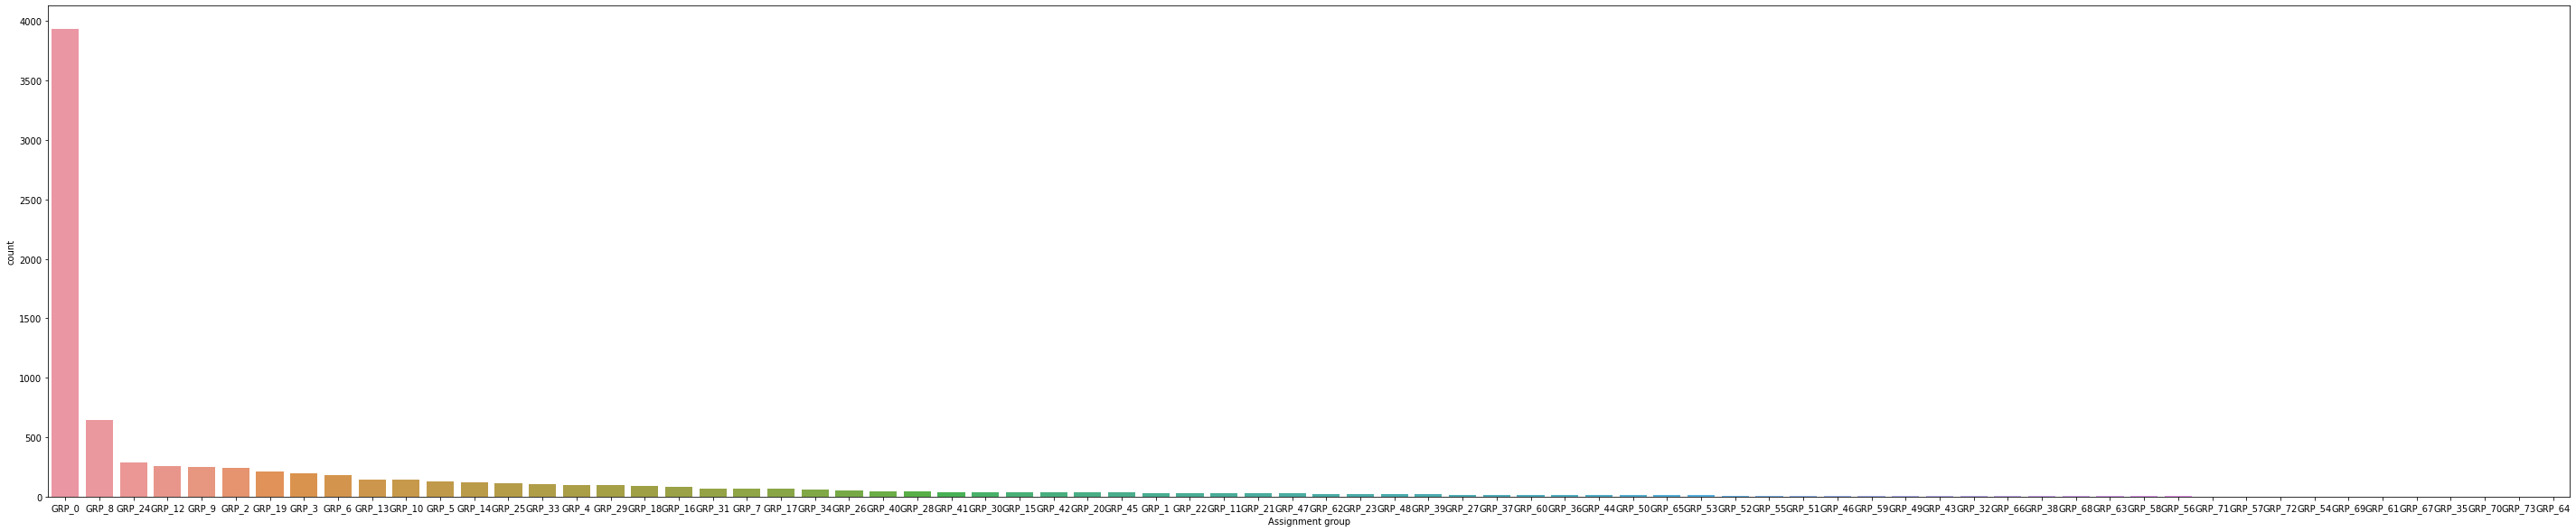

In [90]:
assignment_group_desc_order = ata_data['Assignment group'].value_counts().sort_values(ascending=False).index
plt.figure(figsize=(50,10))
sns.countplot(ata_data['Assignment group'], order=assignment_group_desc_order)

In [91]:
stop_words = set(stopwords.words('english'))

ata_data['number_of_words_short_desc'] = ata_data.short_desc_analysis.apply(lambda x: len(x.split()))
ata_data['number_of_char_short_desc'] = ata_data.short_desc_analysis.str.len()
ata_data['number_of_punctuations_short_desc'] = ata_data.short_desc_analysis.apply(lambda x : len([x for x in x if x in string.punctuation]))
ata_data['number_of_stop_words_short_desc'] = ata_data.short_desc_analysis.apply(lambda x: len([x for x in str(x).split() if x in stop_words]))




ata_data['number_of_words_desc'] = ata_data.desc_analysis.apply(lambda x: len(x.split()))
ata_data['number_of_char_desc'] = ata_data.desc_analysis.str.len()
ata_data['number_of_punctuations_desc'] = ata_data.desc_analysis.apply(lambda x : len([x for x in x if x in string.punctuation]))
ata_data['number_of_stop_words_desc'] = ata_data.desc_analysis.apply(lambda x: len([x for x in str(x).split() if x in stop_words]))

In [92]:
ata_data.head()

,Short description,Description,Caller,Assignment group,short_desc_analysis,desc_analysis,mail_received_from,mail_subject_mentioned,number_of_words_short_desc,number_of_char_short_desc,number_of_punctuations_short_desc,number_of_stop_words_short_desc,number_of_words_desc,number_of_char_desc,number_of_punctuations_desc,number_of_stop_words_desc
0,login issue,-verified user details.(employee# & manager name)\r\n-checked the user name in ad and reset the password.\r\n-advised the user to login and check.\r\n-caller confirmed that he was able to login.\r\n-issue resolved.,spxjnwir pjlcoqds,GRP_0,login issue,-verified user details.(employee# & -checked the user name in ad and reset the password. -advised the user to login and check. -caller confirmed that he was able to login. -issue resolved.,No Match,No Match,2,11,0,0,31,188,13,11
1,outlook,"\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail.com\r\n\r\nhello team,\r\n\r\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?\r\n\r\nkind",hmjdrvpb komuaywn,GRP_0,outlook,"my meetings/skype meetings etc are not appearing in my outlook calendar, can somebody advise how to correct t?",hmjdrvpb.komuaywn@gmail.com,No Match,1,7,0,0,18,111,3,8
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail.com\r\n\r\nhi\r\n\r\ni cannot log on to vpn\r\n\r\nbest,eylqgodm ybqkwiam,GRP_0,cannot log in to vpn,i cannot log on to vpn,eylqgodm.ybqkwiam@gmail.com,No Match,5,20,0,2,6,22,0,3
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,access hr_tool page,access hr_tool page,No Match,No Match,3,19,1,0,3,19,1,0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error,skype error,No Match,No Match,2,11,0,0,2,11,0,0


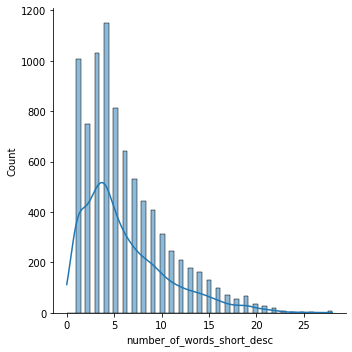

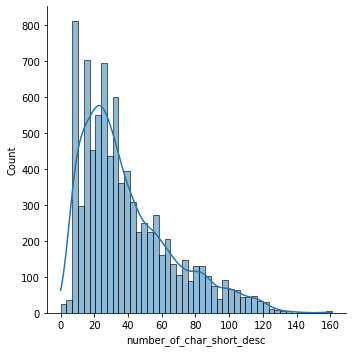

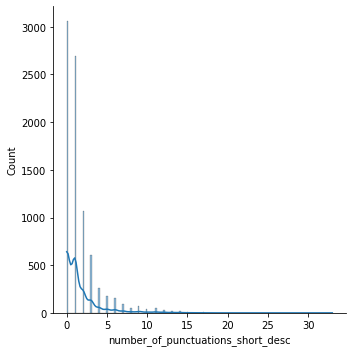

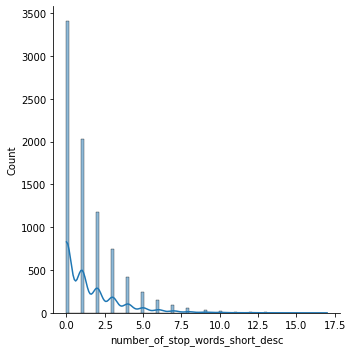

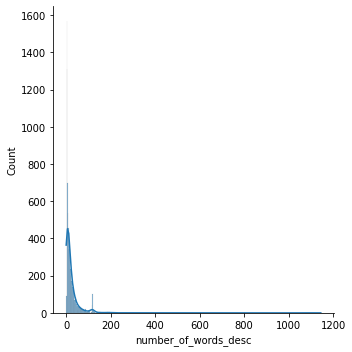

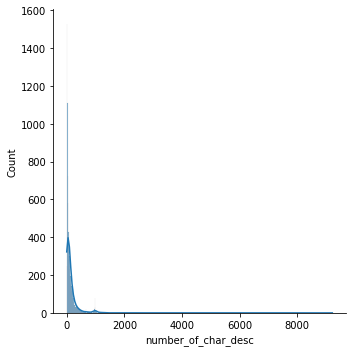

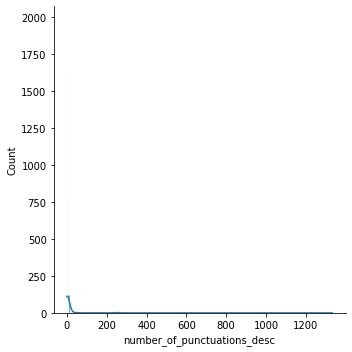

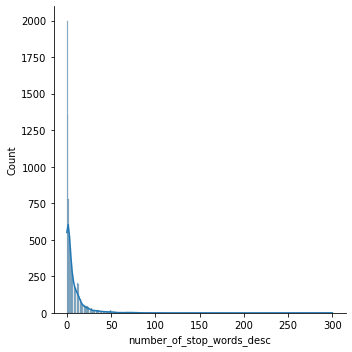

In [93]:
for displot_col in ata_data.select_dtypes(include = 'number').columns:
    sns.displot(ata_data, x = displot_col, kde=True)

In [94]:
ata_data['Caller'].value_counts()

bpctwhsn kzqsbmtp    788
ZkBogxib QsEJzdZO    151
fumkcsji sarmtlhy    128
rbozivdq gmlhrtvp     72
rkupnshb gsmzfojw     71
                    ... 
znyijvpg kjqhrwlv      1
baygwijr lavxwkfc      1
jvpqlgib yuhcljqp      1
qohfjpna exphkims      1
umkrenhp beldshqc      1
Name: Caller, Length: 2950, dtype: int64

In [ ]:
plt.figure(figsize = (20,20))
word_cloud = WordCloud(max_words = 5000 , width = 1600 , height = 800).generate(" ".join(ata_data['desc_analysis']))
plt.title('Description')
plt.imshow(word_cloud , interpolation = 'bilinear')

In [ ]:
plt.figure(figsize = (20,20))
word_cloud = WordCloud(max_words = 5000 , width = 1600 , height = 800).generate(" ".join(ata_data['short_desc_analysis']))
plt.title('Short Description')
plt.imshow(word_cloud , interpolation = 'bilinear')

In [97]:
#for grp in list(ata_data['Assignment group'].unique()):
#  plt.figure(figsize = (20,20))
#  word_cloud = WordCloud(max_words = 100 , width = 1600 , height = 800).generate(" ".join(ata_data[ata_data['Assignment group']==grp]['short_desc_analysis']))
#  plt.title(grp)
#  plt.imshow(word_cloud , interpolation = 'bilinear')

In [98]:
#for grp in list(ata_data['Assignment group'].unique()):
#  plt.figure(figsize = (20,20))
#  word_cloud = WordCloud(max_words = 100 , width = 1600 , height = 800).generate(" ".join(ata_data[ata_data['Assignment group']==grp]['desc_analysis']))
#  plt.title(grp)
#  plt.imshow(word_cloud , interpolation = 'bilinear')

In [99]:
issueResolved=  ata_data[ata_data['desc_analysis'].apply(lambda x: 'issue resolved' in x)]
issueResolved.reset_index()

,index,Short description,Description,Caller,Assignment group,short_desc_analysis,desc_analysis,mail_received_from,mail_subject_mentioned,number_of_words_short_desc,number_of_char_short_desc,number_of_punctuations_short_desc,number_of_stop_words_short_desc,number_of_words_desc,number_of_char_desc,number_of_punctuations_desc,number_of_stop_words_desc
0,0,login issue,-verified user details.(employee# & manager name)\r\n-checked the user name in ad and reset the password.\r\n-advised the user to login and check.\r\n-caller confirmed that he was able to login.\r\n-issue resolved.,spxjnwir pjlcoqds,GRP_0,login issue,-verified user details.(employee# & -checked the user name in ad and reset the password. -advised the user to login and check. -caller confirmed that he was able to login. -issue resolved.,No Match,No Match,2,11,0,0,31,188,13,11
1,65,error login on to the SID_34 system.,error login on to the SID_34 system.\r\n-verified user details.(employee# & manager name)\r\n-user has tried the password_management_tool pwd manager.\r\n-unlocked the erp id.\r\n-caller confirmed that he was able to login.\r\n-issue resolved.,quxtnlgd tqnjyzsm,GRP_0,error login on to the sid_34 system.,error login on to the sid_34 system. -verified user details.(employee# & -user has tried the password_management_tool pwd -unlocked the erp id. -caller confirmed that he was able to login. -issue resolved.,No Match,No Match,7,36,2,3,31,205,16,10
2,73,user needs help to connect to the wireless connection at home.,user needs help to connect to the wireless connection at home.\n-had the user connect to the lan at home.\n-connected to the user system using teamviewer.\n-checked the network settings.\n-help the user login to the home wireless.\n-disconnected the home lan.\n-user confirmed that he is able to login to the home wireless.\n-issue resolved.,imoelsap gxdwkimv,GRP_0,user needs help to connect to the wireless connection at home.,user needs help to connect to the wireless connection at home. -had the user connect to the lan at home. -connected to the user system using iewer. -checked the network settings. -help the user login to the home wireless. -disconnected the home lan. -user confirmed that he is able to login to the home wireless. -issue resolved.,No Match,No Match,11,62,1,4,57,329,15,21
3,144,ess login issue,ess login issue\r\n-verified user details.(employee# & manager name)\r\n-checked the user name in ad and reset the password.\r\n-advised the user to login and check.\r\n-caller confirmed that he was able to login.\r\n-issue resolved.,ukzfqjet zcbhpweo,GRP_0,ess login issue,ess login issue -verified user details.(employee# & -checked the user name in ad and reset the password. -advised the user to login and check. -caller confirmed that he was able to login. -issue resolved.,No Match,No Match,3,15,0,0,34,204,13,11
4,167,user needs training to use engineering tool to view drawings.,user needs training to use engineering tool to view drawings.\r\n-connected to the user system using teamviewer.\r\n-help and educated the user on how login to business_client and view drawings.\r\n-issue resolved.,rkzqjbwc juizkwpl,GRP_0,user needs training to use engineering tool to view drawings.,user needs training to use engineering tool to view drawings. -connected to the user system using iewer. -help and educated the user on how login to business_client and view drawings. -issue resolved.,No Match,No Match,10,61,1,2,32,200,8,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,7594,error login on to the SID_34 system.,"error login on to the SID_34 system.\r\n-verified user details.(employee# & manager name)\r\n-unlocked and reset the erp id to""daypay3"".\r\n-caller confirmed that he was able to login.\r\n-issue resolved.",mbwgkint wjrokfub,GRP_0,error login on to the sid_34 system.,"error login on to the sid_34 system. -verified user details.(employee# & -unlocked and reset the erp id to""daypay3"". -caller confirmed that he was abl

There are 112 tickets, that are already resolved.

In [100]:
issueResolved['Assignment group'].value_counts()

GRP_0     111
GRP_27      1
Name: Assignment group, dtype: int64


Most of these  tickets belongs to GRP_0

Analyzing Ngram

In [101]:
# checking bigram
(pd.Series(nltk.ngrams(ata_data['desc_analysis'], 1)).value_counts())[0:50]

(the,)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 43
(password reset,)                                                                                                                                                                                                                                                                                                             

In [102]:
from sklearn.feature_extraction.text import CountVectorizer
word_vectorizer = CountVectorizer(ngram_range=(1,3), analyzer='word')
sparse_matrix = word_vectorizer.fit_transform(ata_data['desc_analysis'])
frequencies = sum(sparse_matrix).toarray()[0]
pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])[0:50]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,frequency
00,2
00 on,2
00 on until,1
00000etc,1
00000etc inform,1
00000etc inform system,1
0000a0,17
0000a0 0a43,2
0000a0 0a43 6f6e,2
0000a0 2e66,1


In [103]:
ata_data[ata_data['Assignment group'] =='GRP_8']

,Short description,Description,Caller,Assignment group,short_desc_analysis,desc_analysis,mail_received_from,mail_subject_mentioned,number_of_words_short_desc,number_of_char_short_desc,number_of_punctuations_short_desc,number_of_stop_words_short_desc,number_of_words_desc,number_of_char_desc,number_of_punctuations_desc,number_of_stop_words_desc
50,job mm_zscr0099_dly_merktc3 failed in job_scheduler at: 10/31/2016 08:36:00,received from: monitoring_tool@company.com\r\n\r\njob mm_zscr0099_dly_merktc3 failed in job_scheduler at: 10/31/2016 08:36:00,bpctwhsn kzqsbmtp,GRP_8,mm_zscr0099_dly_merktc3,job mm_zscr0099_dly_merktc3,monitoring_tool@company.com,No Match,1,23,3,0,2,27,3,0
59,job mm_zscr0099_dly_merktc2 failed in job_scheduler at: 10/31/2016 05:19:00,received from: monitoring_tool@company.com\r\n\r\njob mm_zscr0099_dly_merktc2 failed in job_scheduler at: 10/31/2016 05:19:00,bpctwhsn kzqsbmtp,GRP_8,mm_zscr0099_dly_merktc2,job mm_zscr0099_dly_merktc2,monitoring_tool@company.com,No Match,1,23,3,0,2,27,3,0
60,job Job_3181 failed in job_scheduler at: 10/31/2016 05:00:00,received from: monitoring_tool@company.com\r\n\r\njob Job_3181 failed in job_scheduler at: 10/31/2016 05:00:00,bpctwhsn kzqsbmtp,GRP_8,job_3181,job job_3181,monitoring_tool@company.com,No Match,1,8,1,0,2,12,1,0
64,apac company : two switches are down since 3.45 am et on 10/31.,apac company : two switches are down since 3.45 am et on 10/31.\r\n\r\ncompany-ap-chn-apac-company-2960-access-sw04 \r\ncompany-ap-chn-apac-company-2960-access-sw03.,utyeofsk rdyzpwhi,GRP_8,apac company : two switches are down since . am et on /.,apac company : two switches are down since . am et on /. company-ap-chn-apac-company--access-sw04 company-ap-chn-apac-company--access-sw03.,No Match,No Match,13,56,4,4,15,141,19,4
68,job Job_1854 failed in job_scheduler at: 10/31/2016 01:36:00,received from: monitoring_tool@company.com\r\n\r\njob Job_1854 failed in job_scheduler at: 10/31/2016 01:36:00,bpctwhsn kzqsbmtp,GRP_8,job_1854,job job_1854,monitoring_tool@company.com,No Match,1,8,1,0,2,12,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8442,abended job in job_scheduler: Job_481,received from: monitoring_tool@company.com\r\n\r\n abended job in job_scheduler: Job_481 at 08/05/16 04:03:26,ZkBogxib QsEJzdZO,GRP_8,job_481,job_481 at // ::,monitoring_tool@company.com,No Match,1,7,1,0,4,16,5,1
8448,abended job in job_scheduler: Job_483,received from: monitoring_tool@company.com\r\n\r\n abended job in job_scheduler: Job_483 at 08/05/16 03:34:26,ZkBogxib QsEJzdZO,GRP_8,job_483,job_483 at // ::,monitoring_tool@company.com,No Match,1,7,1,0,4,16,5,1
8461,reboot lhqsm286 (patent web uacyltoe hxgaycze server) server at 11:00 pm et on 08/04.,reboot lhqsm286 (patent web uacyltoe hxgaycze server) server at 11:00 pm et on 08/04.,uvrbhlnt bjrmalzi,GRP_8,reboot lhqsm286 (patent web uacyltoe hxgaycze server) server at : pm et on /.,reboot lhqsm286 (patent web uacyltoe hxgaycze server) server at : pm et on /.,No Match,No Match,14,77,5,2,14,77,5,2
8466,abended job in job_scheduler: bkwin_HostName_770_inc,received from: monitoring_tool@company.com\r\n\r\n abended job in job_scheduler: bkwin_HostName_770_inc at 08/04/16 22:30:29,ZkBogxib QsEJzdZO,GRP_8,bkwin_hostname_770_inc,bkwin_hostname_770_inc at // ::,monitoring_tool@company.com,No Match,1,22,3,0,4,31,7,1


In [104]:
ata_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8417 entries, 0 to 8499
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Short description                  8409 non-null   object
 1   Description                        8416 non-null   object
 2   Caller                             8417 non-null   object
 3   Assignment group                   8417 non-null   object
 4   short_desc_analysis                8417 non-null   object
 5   desc_analysis                      8417 non-null   object
 6   mail_received_from                 8417 non-null   object
 7   mail_subject_mentioned             8417 non-null   object
 8   number_of_words_short_desc         8417 non-null   int64 
 9   number_of_char_short_desc          8417 non-null   int64 
 10  number_of_punctuations_short_desc  8417 non-null   int64 
 11  number_of_stop_words_short_desc    8417 non-null   int64 
 12  number

In [105]:
ata_data['number_of_char_short_desc'].mean()

39.37079719615065

In [106]:
ata_data['number_of_char_short_desc'].max()

161

In [107]:
ata_data['number_of_char_short_desc'].min()

0

For Short description, the average number of char per statement is 42.  Maximum number of characters is 161

In [108]:
ata_data['number_of_char_desc'].mean()

152.03326600926695

In [109]:
ata_data['number_of_char_desc'].max()

9223

In [110]:
ata_data['number_of_char_desc'].min()

0

For Long description, the average number of char per statement is 154.  Maximum number of characters is 7726

Based on length of sentences, considering using LSTM with Short Description

In [111]:
ata_data['number_of_words_short_desc'].sum()

51377

In [112]:
short_desc_embedding_size=50

In [113]:
short_desc_max_words = 7000

In [114]:
short_desc_length_to_filter = 150

In [115]:
oov_tok = '<OOV>'

In [116]:
ata_data[ata_data['number_of_char_short_desc']>short_desc_length_to_filter]['Short description'].count()

2

In [117]:
print("There are",  ata_data[ata_data['number_of_char_short_desc']>short_desc_length_to_filter]['Short description'].count() , "short description with length greater than", short_desc_length_to_filter)

There are 2 short description with length greater than 150


In [118]:
def conv_text_to_sequences(max_words_input,oov_tok_input,data_input):
  tokenizer = Tokenizer(num_words=max_words_input, filters='!"#$%&()*+,-/.:;<=>?@[\\]^`{|}~\t\n',lower=True, oov_token=oov_tok_input)
  tokenizer.fit_on_texts(data_input)
  word_index = tokenizer.word_index
  sequences = tokenizer.texts_to_sequences(data_input)
  return sequences, word_index

In [119]:
short_desc_sequences, short_desc_word_index = conv_text_to_sequences(short_desc_max_words, oov_tok, ata_data['short_desc_analysis'])

In [120]:
print(short_desc_sequences)

[[18, 13], [16], [28, 60, 9, 2, 29], [14, 124, 263], [34, 24], [60, 9, 2, 80, 67, 15, 34], [511, 550, 1858, 17, 126, 5, 583, 27, 2785, 321, 10, 649, 264, 2786], [2787, 1004, 174, 47, 806, 179, 418, 1005, 246], [1175, 110, 2788, 4, 16], [43, 30, 4, 2789], [80, 67, 584, 3, 226, 15, 81, 2, 331, 296], [124, 65, 3, 265, 263, 585], [18, 2, 124, 2, 2790, 2791, 1426], [26, 551, 2, 11, 5, 7], [51, 807], [43, 30, 4, 2792], [18, 2, 17, 29], [83, 2793, 74, 134, 93, 3, 704, 303], [8, 25, 12, 21], [203, 130, 29], [125, 807], [29, 13], [55, 2, 29], [26, 278, 10, 480, 79, 138], [29, 3, 22], [8, 264, 7, 11], [18, 2, 124, 2, 125, 807], [12, 21, 49], [18, 2, 124], [60, 9, 2, 8, 25], [7, 11, 10, 57], [11, 204], [2794, 27, 46, 227], [146, 7, 11], [104, 452, 481], [2795, 1004, 174, 47, 806, 179], [8, 25, 12, 56, 15, 7, 11], [892, 1859, 893, 2, 1176], [1006, 80, 67], [89, 10, 1860, 1861], [43, 30, 2796], [419, 362, 3, 22], [18, 2, 53], [1177, 453, 4, 2797, 2, 2798, 13, 166, 2, 68, 808, 420], [18, 2, 124, 297

In [121]:
print(short_desc_word_index)

{'<OOV>': 1, 'to': 2, 'not': 3, 'on': 4, 'the': 5, 'is': 6, 'password': 7, 'erp': 8, 'in': 9, 'for': 10, 'reset': 11, 'account': 12, 'issue': 13, 'access': 14, 'and': 15, 'outlook': 16, 'company': 17, 'login': 18, 'down': 19, 'with': 20, 'locked': 21, 'working': 22, 'from': 23, 'error': 24, 'sid_34': 25, 'user': 26, 'of': 27, 'cannot': 28, 'vpn': 29, 'update': 30, 'a': 31, 'i': 32, 'at': 33, 'skype': 34, 'need': 35, 'since': 36, 'crm': 37, 'et': 38, 'my': 39, 'printer': 40, 'windows': 41, 'no': 42, 'ticket': 43, 'am': 44, 'usa': 45, 'network': 46, 'new': 47, 'outage': 48, 'out': 49, 'up': 50, 'open': 51, 'email': 52, 'system': 53, 'password_management_tool': 54, 'connect': 55, 'unlock': 56, 'collaboration_platform': 57, 'server': 58, 'does': 59, 'log': 60, 'help': 61, 'request': 62, 'it': 63, 'are': 64, 'site': 65, 'problems': 66, 'tool': 67, 'be': 68, 'can': 69, 'circuit': 70, 'change': 71, 'using': 72, 'work': 73, 'pc': 74, 'problem': 75, 'laptop': 76, 'computer': 77, 'has': 78, 'pho

In [122]:
short_desc_word_index['job_3181']

894

In [123]:
print(len(short_desc_sequences))

8417


In [124]:
type(short_desc_sequences)

list

In [125]:
def FindMaxLength(lst):
  maxList = max((x) for x in lst)
  maxLength = max(len(x) for x in lst )
  return maxList, maxLength

In [126]:
short_desc_max_list, short_desc_length_to_filter = FindMaxLength(short_desc_sequences)

In [127]:
short_desc_length_to_filter

28

In [130]:
short_desc_length_to_filter_input = int(0.3*short_desc_length_to_filter)
short_desc_length_to_filter_input

8

In [131]:
def padded_sequence(sequences_input, length_to_filter_input, padding_input, truncat_input):
  padded_text_sequences = pad_sequences(sequences_input, maxlen = length_to_filter_input, padding=padding_input, truncating=truncat_input)
  return padded_text_sequences

In [132]:
short_desc_padded_sequences = padded_sequence(short_desc_sequences, short_desc_length_to_filter_input, 'post', 'post')

In [133]:
short_desc_padded_sequences

array([[  18,   13,    0, ...,    0,    0,    0],
       [  16,    0,    0, ...,    0,    0,    0],
       [  28,   60,    9, ...,    0,    0,    0],
       ...,
       [ 559,   41,    7, ..., 6862, 6863,    0],
       [ 208,    6,    3, ...,    0,    0,    0],
       [ 622, 6864,   28, ...,    4,  721, 1408]], dtype=int32)

In [134]:
print("Number of words:", len(short_desc_word_index)+1)

Number of words: 6865


In [135]:
short_desc_vocab_size = len(short_desc_word_index)+1

Inverting the indexes to re-create the short description

In [136]:
inverted_short_desc_word_index = dict((i, word) for (word, i) in short_desc_word_index.items())

In [137]:
short_desc_decoded_sequence = " ".join(inverted_short_desc_word_index[i] for i in short_desc_sequences[0])
print(short_desc_decoded_sequence)

login issue


Applying Glove Word Embeddings

In [140]:
glove_50d_file_path = '/content/drive/MyDrive/GL/NLP-1/glove.6B.50d.txt'

In [141]:
short_desc_embedding_size_50d = 50

In [138]:
def glove_emb_index(glove_file_path_input):
  glove_embeddings_index = {}
  glove_embedding_file = open(glove_file_path_input)

  for glove_embedding_value in glove_embedding_file:
    word_d = glove_embedding_value.split(" ")[0]
    glove_embedding = glove_embedding_value.split(" ")[1:]
    glove_embedding = np.asarray(glove_embedding, dtype='float32')
    glove_embeddings_index[word_d] = glove_embedding
  glove_embedding_file.close()
  return glove_embeddings_index


In [142]:
glove_50d_embeddings_index = glove_emb_index(glove_50d_file_path)

In [143]:
def glove_emb_matrix(vocab_size_input, emb_size_input, word_index_input,glove_emb_ind_input):
  glove_embedding_matrix = np.zeros((vocab_size_input, emb_size_input))
  for word, i in word_index_input.items():
    embedding_vector = glove_emb_ind_input.get(word)
    if embedding_vector is not None:
      glove_embedding_matrix[i] = embedding_vector
  return glove_embedding_matrix

In [144]:
glove_50d_embedding_matrix = glove_emb_matrix(short_desc_vocab_size, short_desc_embedding_size_50d, short_desc_word_index, glove_50d_embeddings_index)

In [145]:
glove_50d_embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.68046999, -0.039263  ,  0.30186   , ..., -0.073297  ,
        -0.064699  , -0.26043999],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.04501   ,  0.30759999,  0.37081999, ...,  1.13110006,
        -0.59377003,  1.06760001]])

In [146]:
X_ds_sd = short_desc_padded_sequences

In [147]:
y_ds = pd.DataFrame()

In [148]:
y_ds['assignment_group'] = ata_data['Assignment group'].copy(deep=True)

In [149]:
le = LabelEncoder()
y_ds['assignment_group'] = le.fit_transform(y_ds['assignment_group'])

In [150]:
y_ds['assignment_group'].value_counts()

0     3934
72     645
17     285
4      257
73     252
      ... 
58       1
61       1
68       1
29       1
71       1
Name: assignment_group, Length: 74, dtype: int64

In [151]:
groupings = (y_ds['assignment_group'].max()) + 1
#groupings = len(y_ds['assignment_group'].unique())

In [152]:
groupings

74

In [153]:
ros = RandomOverSampler(random_state=seed)

In [154]:
# fit predictor and target variable
X_ds_sd_ros, y_ds_ros = ros.fit_resample(X_ds_sd, y_ds)

print('original dataset shape:', y_ds.value_counts())
print('Resample dataset shape', y_ds_ros.value_counts())

original dataset shape: assignment_group
0                   3934
72                   645
17                   285
4                    257
73                   252
                    ... 
64                     1
58                     1
71                     1
29                     1
68                     1
Length: 74, dtype: int64
Resample dataset shape assignment_group
73                  3934
18                  3934
20                  3934
21                  3934
22                  3934
                    ... 
49                  3934
50                  3934
51                  3934
52                  3934
0                   3934
Length: 74, dtype: int64


In [155]:
X_train_sd, X_val_test_sd, y_train, y_val_test = train_test_split(X_ds_sd_ros,y_ds_ros, test_size = 0.2, random_state = seed, shuffle = True, stratify = y_ds_ros)

In [156]:
X_val_sd, X_test_sd, y_val, y_test = train_test_split(X_val_test_sd,y_val_test, test_size = 0.5, random_state = seed, shuffle = True, stratify = y_val_test)

In [157]:
X_train_sd

array([[ 929, 4479,   71, ..., 4480,  645,   52],
       [  34,   10,  221, ...,   19,   83,  692],
       [1825, 6187,   28, ...,    0,    0,    0],
       ...,
       [  32,   28,   14, ...,   96,   32,  156],
       [3595,    0,    0, ...,    0,    0,    0],
       [  35,   14,    2, ...,    0,    0,    0]], dtype=int32)

In [158]:
short_desc_opt = optimizers.Adam(learning_rate=0.0001)

In [155]:
#sd_glove_50d_bidi_lstm_model  = Sequential()
#sd_glove_50d_bidi_lstm_model.add(Embedding(short_desc_vocab_size, short_desc_embedding_size_50d, weights=[glove_50d_embedding_matrix], input_length=short_desc_length_to_filter_input, trainable=False))
#sd_glove_50d_bidi_lstm_model.add(Bidirectional(LSTM(short_desc_embedding_size_50d*3, dropout=0.2, recurrent_dropout=0.2, return_sequences=False)))
#sd_glove_50d_bidi_lstm_model.add(Dropout(0.2))
#sd_glove_50d_bidi_lstm_model.add(Flatten())
#sd_glove_50d_bidi_lstm_model.add(Dense(groupings, activation='softmax'))
#sd_glove_50d_bidi_lstm_model.compile(optimizer = short_desc_opt, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [156]:
#print(sd_glove_50d_bidi_lstm_model.summary())

In [157]:
#sd_glove_50d_bidi_lstm_model_execution_data = sd_glove_50d_bidi_lstm_model.fit(X_train_sd, y_train, validation_data=(X_val_sd, y_val), epochs=10, batch_size=100, verbose=2)

In [158]:
#sd_glove_50d_bidi_lstm_model  = Sequential()
#sd_glove_50d_bidi_lstm_model.add(Embedding(short_desc_vocab_size, short_desc_embedding_size_50d, weights=[glove_50d_embedding_matrix], input_length=short_desc_length_to_filter_input, trainable=False))
#sd_glove_50d_bidi_lstm_model.add(SpatialDropout1D(0.2))
#sd_glove_50d_bidi_lstm_model.reshape()



#sd_glove_50d_bidi_lstm_model.add(Conv1D(filters=short_desc_embedding_size_50d*3, kernel_size=2, padding='same', activation='relu'))
#sd_glove_50d_bidi_lstm_model.add(SpatialDropout1D(0.2))
#sd_glove_50d_bidi_lstm_model.add(MaxPooling1D(pool_size=2))
#sd_glove_50d_bidi_lstm_model.add(SpatialDropout1D(0.2))
#sd_glove_50d_bidi_lstm_model.add(Bidirectional(LSTM(short_desc_embedding_size_50d*3, dropout=0.2, recurrent_dropout=0.2, return_sequences=False)))
##sd_glove_50d_bidi_lstm_model.add(Dropout(0.2))
#sd_glove_50d_bidi_lstm_model.add(Flatten())
#sd_glove_50d_bidi_lstm_model.add(Dense(groupings, activation='softmax'))
#sd_glove_50d_bidi_lstm_model.compile(optimizer = short_desc_opt, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [159]:
def get_model():
  inp = Input(shape=(short_desc_length_to_filter_input, ))
  x = Embedding(short_desc_vocab_size, short_desc_embedding_size_50d, weights=[glove_50d_embedding_matrix])(inp)
  x = SpatialDropout1D(0.2)(x)
  x = Reshape((short_desc_length_to_filter_input, short_desc_embedding_size_50d, 1))(x)
  x = Conv2D(filters=32 , kernel_size=3, strides=2, padding='valid')(x)
  x = Activation('relu')(x)
  x = Dropout(0.2)(x)
  x_w, x_h, x_d = [int(value) for value in x.shape[1:]]
  x = Permute((1,3,2))(x)
  x = Reshape((x_w, x_h * x_d))(x)
  x = Bidirectional(LSTM(128, return_sequences=True))(x)
  x = SpatialDropout1D(0.2)(x)
  x = GlobalMaxPooling1D()(x)
  x = Dense(128, activation='relu')(x)
  x = Dropout(0.2)(x)
  outp = Dense(groupings, activation='softmax')(x)

  model = Model(inputs=inp, outputs=outp)
  model.compile(loss='sparse_categorical_crossentropy',
                optimizer=short_desc_opt,
                metrics=['accuracy'])
  
  return model

In [160]:
sd_glove_50d_bidi_lstm_model = get_model()

In [161]:
sd_glove_50d_bidi_lstm_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8)]               0         
                                                                 
 embedding (Embedding)       (None, 8, 50)             343250    
                                                                 
 spatial_dropout1d (SpatialD  (None, 8, 50)            0         
 ropout1D)                                                       
                                                                 
 reshape (Reshape)           (None, 8, 50, 1)          0         
                                                                 
 conv2d (Conv2D)             (None, 3, 24, 32)         320       
                                                                 
 activation (Activation)     (None, 3, 24, 32)         0         
                                                             

In [164]:
sd_glove_50d_bidi_lstm_model.compile(optimizer = short_desc_opt, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [165]:
sd_glove_50d_bidi_lstm_model_execution_data = sd_glove_50d_bidi_lstm_model.fit(X_train_sd, y_train, validation_data=(X_val_sd, y_val), epochs=20, batch_size=100, verbose=2)

Epoch 1/20
2329/2329 - 178s - loss: 2.5242 - accuracy: 0.4171 - val_loss: 1.1730 - val_accuracy: 0.7352 - 178s/epoch - 76ms/step
Epoch 2/20
2329/2329 - 172s - loss: 1.2561 - accuracy: 0.6796 - val_loss: 0.6430 - val_accuracy: 0.8418 - 172s/epoch - 74ms/step
Epoch 3/20
2329/2329 - 191s - loss: 0.8451 - accuracy: 0.7785 - val_loss: 0.4143 - val_accuracy: 0.8921 - 191s/epoch - 82ms/step
Epoch 4/20
2329/2329 - 176s - loss: 0.6242 - accuracy: 0.8315 - val_loss: 0.2956 - val_accuracy: 0.9231 - 176s/epoch - 76ms/step
Epoch 5/20
2329/2329 - 173s - loss: 0.4849 - accuracy: 0.8672 - val_loss: 0.2179 - val_accuracy: 0.9424 - 173s/epoch - 74ms/step
Epoch 6/20
2329/2329 - 173s - loss: 0.3912 - accuracy: 0.8904 - val_loss: 0.1735 - val_accuracy: 0.9540 - 173s/epoch - 74ms/step
Epoch 7/20
2329/2329 - 173s - loss: 0.3225 - accuracy: 0.9081 - val_loss: 0.1379 - val_accuracy: 0.9613 - 173s/epoch - 74ms/step
Epoch 8/20
2329/2329 - 173s - loss: 0.2744 - accuracy: 0.9215 - val_loss: 0.1197 - val_accuracy: 

In [167]:
bidi_lstm_glove50d_classifier_history_dict = sd_glove_50d_bidi_lstm_model_execution_data.history
bidi_lstm_glove50d_classifier_history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

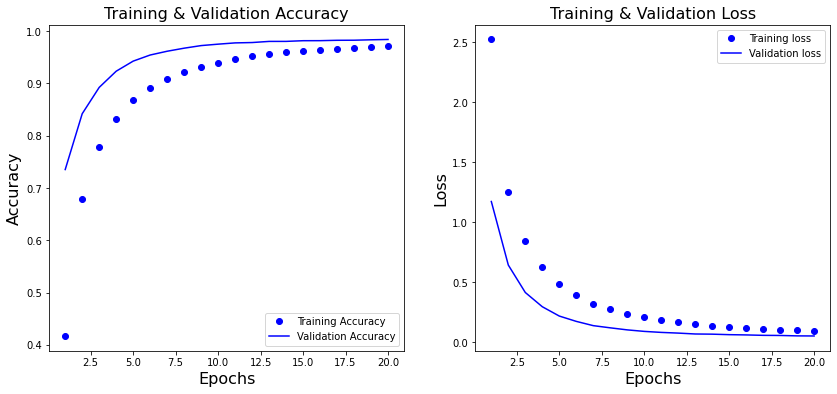

In [168]:
loss_values = bidi_lstm_glove50d_classifier_history_dict['loss']
val_loss_values = bidi_lstm_glove50d_classifier_history_dict['val_loss']
accuracy_values = bidi_lstm_glove50d_classifier_history_dict['accuracy']
val_accuracy_values = bidi_lstm_glove50d_classifier_history_dict['val_accuracy']
 
epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy (MAE) vs Epochs
#
ax[0].plot(epochs, accuracy_values, 'bo', label='Training Accuracy')
ax[0].plot(epochs, val_accuracy_values, 'b', label='Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'bo', label='Training loss')
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

In [169]:
labels = list(le.inverse_transform(y_test['assignment_group'].unique()))
print(labels)

['GRP_38', 'GRP_35', 'GRP_37', 'GRP_10', 'GRP_31', 'GRP_43', 'GRP_13', 'GRP_5', 'GRP_40', 'GRP_63', 'GRP_50', 'GRP_23', 'GRP_57', 'GRP_3', 'GRP_42', 'GRP_21', 'GRP_51', 'GRP_18', 'GRP_68', 'GRP_6', 'GRP_71', 'GRP_27', 'GRP_36', 'GRP_44', 'GRP_2', 'GRP_9', 'GRP_60', 'GRP_64', 'GRP_8', 'GRP_53', 'GRP_19', 'GRP_20', 'GRP_69', 'GRP_7', 'GRP_17', 'GRP_14', 'GRP_72', 'GRP_22', 'GRP_55', 'GRP_49', 'GRP_65', 'GRP_11', 'GRP_28', 'GRP_39', 'GRP_1', 'GRP_52', 'GRP_54', 'GRP_73', 'GRP_61', 'GRP_47', 'GRP_16', 'GRP_0', 'GRP_48', 'GRP_62', 'GRP_33', 'GRP_26', 'GRP_4', 'GRP_46', 'GRP_34', 'GRP_41', 'GRP_56', 'GRP_29', 'GRP_24', 'GRP_25', 'GRP_32', 'GRP_67', 'GRP_59', 'GRP_15', 'GRP_45', 'GRP_30', 'GRP_12', 'GRP_66', 'GRP_70', 'GRP_58']


In [170]:
len(labels)

74

In [187]:
sd_glove_50d_bidi_lstm_model.save('short_desc_model.h5')

In [190]:
load_saved_model = load_model('/content/short_desc_model.h5')

In [191]:
#sd_glove_50d_bidi_lstm_model_pred = sd_glove_50d_bidi_lstm_model.predict(X_test_sd)
sd_glove_50d_bidi_lstm_model_pred = load_saved_model.predict(X_test_sd)

In [192]:
len(y_test['assignment_group'].unique())

74

In [193]:
#print(classification_report(y_true, y_pred, target_names=target_names)
print(classification_report(y_test, sd_glove_50d_bidi_lstm_model_pred.argmax(axis=1), target_names=labels))

              precision    recall  f1-score   support

      GRP_38       0.98      0.58      0.72       393
      GRP_35       0.99      1.00      1.00       394
      GRP_37       0.98      1.00      0.99       393
      GRP_10       0.98      1.00      0.99       393
      GRP_31       0.96      0.94      0.95       393
      GRP_43       0.97      1.00      0.98       393
      GRP_13       0.97      0.95      0.96       394
       GRP_5       0.99      0.94      0.96       394
      GRP_40       0.98      1.00      0.99       393
      GRP_63       1.00      1.00      1.00       393
      GRP_50       0.99      0.99      0.99       393
      GRP_23       0.95      0.96      0.95       394
      GRP_57       0.93      0.98      0.95       394
       GRP_3       0.99      1.00      0.99       394
      GRP_42       0.99      1.00      1.00       393
      GRP_21       0.92      1.00      0.96       393
      GRP_51       0.99      1.00      1.00       393
      GRP_18       0.99    

In [194]:
X_test_sd

array([[ 737, 2981,   24, ...,    6,    3, 2982],
       [  35,   14,    2, ...,    0,    0,    0],
       [ 576,  379,  315, ...,   79,   53,    0],
       ...,
       [ 102,  174,   30, ...,    0,    0,    0],
       [  30, 1842,    2, ...,  542,    0,    0],
       [  95,   79,    0, ...,    0,    0,    0]], dtype=int32)

In [195]:
short_desc_decoded_sequence = " ".join(inverted_short_desc_word_index[i] for i in np.delete(X_test_sd[0], np.argwhere(X_test_sd[0] == 0)))
print(short_desc_decoded_sequence)

hpqc delivers error message user is not maintained


In [196]:
X_test_sd[0]

array([ 737, 2981,   24,  108,   26,    6,    3, 2982], dtype=int32)

In [197]:
np.delete(X_test_sd[0], np.argwhere(X_test_sd[0] == 0))

array([ 737, 2981,   24,  108,   26,    6,    3, 2982], dtype=int32)

In [198]:
decoded_test_text = []

In [199]:
for elem in X_test_sd:
  short_desc_decoded_sequence = " ".join(inverted_short_desc_word_index[i] for i in np.delete(elem, np.argwhere(elem == 0)))
  decoded_test_text.append(short_desc_decoded_sequence)


In [200]:
data_to_check = pd.DataFrame()

In [201]:
data_to_check['decoded_text'] = decoded_test_text

In [202]:
data_to_check['actual_assignment_grp'] = list(le.inverse_transform(y_test['assignment_group']))

In [203]:
data_to_check['pred_assignment_group'] = list(le.inverse_transform(sd_glove_50d_bidi_lstm_model_pred.argmax(axis=1)))

In [204]:
data_to_check.head()

,decoded_text,actual_assignment_grp,pred_assignment_group
0,hpqc delivers error message user is not maintained,GRP_38,GRP_38
1,need access to erp kp06789,GRP_35,GRP_35
2,make outbound calls from siemens phone system,GRP_37,GRP_37
3,help to pose the pos wh cannot be,GRP_10,GRP_10
4,tablet dell cannot connect to wireless wifi network,GRP_31,GRP_31


In [205]:
data_to_check.to_excel("output_to_check.xlsx")

In [206]:
pip install Lime

     |████████████████████████████████| 275 kB 22.6 MB/s 
  Created wheel for Lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=97e3c2a87ddf58c4c0c6cbc7b912ba827676cf62bb25794c7fc95c1113a9fed6
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built Lime


In [184]:
import seaborn as sns
%matplotlib inline
from collections import OrderedDict
from lime.lime_text import LimeTextExplainer

In [185]:
explainer = LimeTextExplainer(class_names=labels)

In [186]:
explanation = explainer.explain_instance(X_test_sd[0], sd_glove_50d_bidi_lstm_model.predict(X_test_sd[0:1]).argmax(axis=1), num_features=8)

TypeError: ignored

In [ ]:
X_test_sd[0]

In [ ]:
padded_sequences = pad_sequences(sequences, maxlen = short_desc_length_to_filter)

In [ ]:
padded_sequences

In [ ]:
ata_data[ata_data['number_of_char_short_desc']==short_desc_length_to_filter]

## PLAY AREA

In [ ]:
line = "should we use regex more often? let me know at  received from:321dsasdsa@dasdsa.com.lol"
match = re.search(r'received from: [\w\.-]+@[\w\.-]+', line)
#match.group(0)

In [ ]:
if bool(match):
  print(match.group(0))
else:
  print("noth")
  

In [ ]:
ata_data[ata_data['Description'].str.contains('to:', case=False, na=False)].head()

In [ ]:
text1 = 'from: mikhghytr wafglhdrhjop \nsent: thursday, august 04, 2016 8:50 pm\nto: nwfodmhc exurcwkm\nsubject: rak fw: ethics collaboration_platform site\n\nplease review your recent ticketing_tool tickets and let me know who modified the ethics collaboration_platform site. a few weeks ago i had requested a change that placed a third column of selections. not sure who or why this was undone.\n\nmikhghytr wafglhdrhjop\nsr. manager, global ethics and compliance programdntys\nfrom: kzbuhixt zjdmoahr \nsent: thursday, august 04, 2016 11:16 am\nto: mikhghytr wafglhdrhjop <azxhejvq.fyemlavd@gmail.com>\nsubject: re: ethics collaboration_platform site\n\nohâ€¦â€¦??\n\nsethdyr hdtyr\nassistant general counsel â€“ compliance and real estate\nglobal director of ethics & compliance; ccep\nkzbuhixt.zjdmoahr@gmail.com \n'

In [ ]:
match_text1 = re.search(r'subject:.*[\r\n\t\f\v]', text1)
match_text1.group(0)

In [ ]:
text2 = 'from: pacvbetl yptglhoe \r\nsent: thursday, august 04, 2016 10:59 pm\r\nto: nwfodmhc exurcwkm\r\nsubject: amar fw: case id [ref:_case-111121032:ref] :: others\r\n\r\nplease see the forwarded email below. this looks suspicious to me and may be some sort of phishing or spamming email. please review it and let me know if it looks legitimate and is from legitimate individuals at company. i did not open or view any of the attachments. \r\n\r\ni have no idea why accounts payable would be sending me an email.\r\n\r\nbest'

In [ ]:
match_text2 = re.search(r'subject:.*[\r\n\t\f\v]', text2)
match_text2.group(0)

In [ ]:
text3 = 'from: brdhdd dhwduw\nsent: thursday, october 27, 2016 6:12 am\nto: nwfodmhc exurcwkm\nsubject::fwd: unable to down load ethics module \n\n\nbegin forwarded message:\nfrom: <dqwhpjxy.pozjxbey@gmail.com>\nto: <zanivrec.capbfhur@gmail.com>\nsubject: unable to down load ethics module \nhi â€“ trust doing well . i am unable to down load & getting below msg. i did reset resolution however still same issue persist.\n \nplease help.\n \n \n \n \n \ndirector of sales \ncompany indirect channels - asia \n& \ndqwhpjxy.pozjxbey@gmail.com \n\n \n \n \n \n\n\n'

In [ ]:
match_text3 = re.search(r'from:.*[\r\n\t\f\v]', text3)
match_text3.group(0)

In [ ]:
def remove_digits(text):
  digits_rem = ''.join((x for x in text if not x.isdigit()))
  return digits_rem

In [ ]:
text3 = 'job job_3242 failed at 2 d'

In [ ]:
remove_digits(text3)

In [ ]:
match_text3 = re.findall(r'\b\d+\b', text3)
match_text3

In [ ]:
match_text3.groups(1)

In [ ]:
sub_text3 = match_text3.group(0).replace('subject:',"")
sub_text3

In [ ]:
match_text3 = re.findall(r'frm:.*[\r\n\t\f\v]', text3)
match_text3

In [ ]:
for text in match_text3:
  text3 = text3.replace(text, "")

In [ ]:
text3

In [ ]:
a = ['it'] + ['was'] + ['annoying']
a

In [ ]:
type(a)

In [ ]:
text4 = '\n\nreceived from: bwfhtumx.japznrvb@gmail.com\n\n\n\n[cid:image001.jpg@01d230f7.8bb4e830]\n\nbwfhtumx japznrvb \nregional controller\nbwfhtumx.japznrvb@gmail.com<mailto:bwfhtumx.japznrvb@gmail.com>\n\n\n\n'

In [ ]:
match_text4 = re.findall(r'\[cid:image.*\]', text4)
match_text4

In [ ]:
sentence = "Tanzania ni nchi inayoongoza kwa utalii barani afrika"
print(detect(sentence))

In [ ]:
sec_sen = " 不能连接"
print(detect(sec_sen))

In [ ]:
text_job = 'job job_1424 failed in job_scheduler at: 10/31/2016 09:06:00'

In [ ]:
match_text_job = re.findall(r'^job\s', text_job)
match_text_job

In [ ]:
text = 'job job_495 failed in job_scheduler'

In [ ]:
match_text_job = re.findall(r'failed in job_scheduler', text)
match_text_job

In [ ]:
text = '2nd day of 1st month is 12th game of the 3rd season'

In [ ]:
a = re.sub(r"(\d+)(st|nd|rd|th)\b",'', text)
a

In [ ]:
match_text_job = re.findall(r'^job', text)
match_text_job

In [ ]:
ftfy.fix_text('aktuell kÃ¶nnen keine rÃ¼ckmeldungen in EU_tool eingegeben werden. fehler "laufzeitfehler".')

In [ ]:
ftfy.fix_text('ç”µè„‘ç™»å½•å¯†ç å¿˜è®°ï¼Œé‡ç½®å¯†ç ã€‚')

In [ ]:
ftfy.fix_text('skype error')

In [ ]:
ftfy.fix_text('ç”µè„‘ç™»å½•å¯†ç å¿˜è®°ï¼Œé‡ç½®å¯†ç ã€‚')

In [ ]:
to_translate = ftfy.fix_text('ç”µè„‘ç™»å½•å¯†ç å¿˜è®°ï¼Œé‡ç½®å¯†ç ã€‚')
translated = GoogleTranslator(source='auto', target='english').translate(to_translate)

print(translated)

In [ ]:
translate_to_english(ftfy.fix_text('ç”µè„‘ç™»å½•å¯†ç å¿˜è®°ï¼Œé‡ç½®å¯†ç ã€‚'))

In [ ]:
translate_to_english(ftfy.fix_text('my name is'))

In [ ]:
to_translate = ftfy.fix_text('aktuell kÃ¶nnen keine rÃ¼ckmeldungen in EU_tool eingegeben werden. fehler "laufzeitfehler".')
translated = GoogleTranslator(source='auto', target='english').translate(to_translate)

print(translated)

In [ ]:
to_translate = ftfy.fix_text('ç”µè„‘ç™»å½•å¯†ç å¿˜è®°ï¼Œé‡ç½®å¯†ç ã€‚')
translated = GoogleTranslator(source='auto', target='english').translate(to_translate)

print(translated)

In [ ]:
len(translated)

In [ ]:
ata_data[ata_data['Short description'].str.contains('login issue', case=False, na=False)]['Assignment group'].value_counts()

In [ ]:
t1 = 'following  trail employee working in pthyu is unable to login  company hub mail id to view salary slip. request to rectify the same aerp mail id: hjsastadad.kjddwdd@company.com user id: wshqqhdqh password:vasanqi'
match_good_day_trial= re.findall(r'\S+@\S+', t1)
match_good_day_trial

In [ ]:
t1 = 'following  trail employee working in pthyu is (yes/no/na) unable to login  company hub mail  id to view salary slip. request to rectify the same aerp mail id: hjsastadad.kjddwdd@company.com user id: wshqqhdqh password:vasanqi'
match_good_day_trial= re.findall(r'(\(yes/no/na\))', t1)
match_good_day_trial

In [ ]:
for matched_text in match_good_day_trial:
    t1 = t1.replace(matched_text, "")
t1

In [ ]:

match_hello_trial= re.search(r'(^|\s)(hello i.t. team|hello help-team|hello support team|hello help-team|hello it-team|hello ladies and gentlemen|hello  it helper|hellow|hello it support|hello all|hello colleagues|hi there|hello it team|hello sir|hello it service|hello it|hello helpdesk|hello team|hello all|hello it desk|hello  it helper|hello dac|hello|gentles|it team|dear team|dear all|dear|hallo|all groups|it help)(,|\s|!|.|:|;|<|~)', 'dear team,  please release the device as per attached form as an employee owned mobile device. the corresponding form is attached. for the moment i am using the outlook app.  hello joftgost,  please approve the form in return by mail.')
match_hello_trial

In [ ]:
match_hello_trial.group(0)

In [ ]:
match_hello_trial.group(1)

In [ ]:
match_hello_trial.group(2)

In [ ]:
match_hello_trial.group(3)

In [ ]:
match_hello_trial

In [ ]:
text = '''i had to reset my password again and i've lost my option for setting up a skype meeting again.  can you please help me?  i can't recall how you were able to bring it back the last time.'''
  
contractions.fix(text)

In [ ]:
text_check = '......my meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct t?..'

match_text_check = re.match(r'^[.]*', text_check)
match_text_check

In [ ]:
ata_data.head()

In [ ]:
# Checking duplicate records

ata_data.duplicate

In [ ]:
issueResolved=  ata_data[ata_data['desc_analysis'].apply(lambda x: 'issue resolved' in x)]
issueResolved.reset_index()

In [ ]:
# There are 112 tickets, that are already resolved.

In [ ]:
issueResolved['Assignment group'].value_counts()

# Most of these  tickets belongs to GRP_0

Analyzing Ngram

In [ ]:
# checking bigram
(pd.Series(nltk.ngrams(ata_data['desc_analysis'], 1)).value_counts())[0:50]

In [ ]:
# There is pattern of text "at: // ::", these pattern suggest path name.
# We can replace these pattern with "PATH" string.

In [ ]:
def replace_pathPattern(text):
  text=text.replace('at: // ::','at PATH')
  text=text.replace('at // ::','at PATH')
  return text

ata_data['desc_analysis']=ata_data['desc_analysis'].apply(replace_pathPattern)

In [ ]:
(pd.Series(nltk.ngrams(ata_data['desc_analysis'], 2)).value_counts())[0:50]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
word_vectorizer = CountVectorizer(ngram_range=(1,3), analyzer='word')
sparse_matrix = word_vectorizer.fit_transform(ata_data['desc_analysis'])
frequencies = sum(sparse_matrix).toarray()[0]
pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])[0:50]

In [ ]:
ata_data[ata_data['Assignment group'] =='GRP_8']

# Replacing descrition with Short description for GRP_8

In [ ]:

ata_data[ata_data['Assignment group'] =='GRP_8']['desc_analysis']=ata_data[ata_data['Assignment group'] =='GRP_8']['short_desc_analysis']

In [ ]:
ata_data[ata_data['Assignment group'] =='GRP_9'].head()

# Feature engineering
-- grouping simillar assignment group together.

In [ ]:
# Filtering short_desc_anlysis,desc_analysis and assigment group

filtered=ata_data[['short_desc_analysis','desc_analysis','Assignment group']]

In [ ]:
from io import StringIO
filtered['GroupID']=filtered['Assignment group'].factorize()[0]

In [ ]:
filtered.head()

In [ ]:
grouped_df  =filtered[['Assignment group','GroupID']].drop_duplicates()
group_to_groupId=dict(grouped_df.values)
groupId_to_group=dict(grouped_df[['GroupID','Assignment group']].values)

In [ ]:
import matplotlib.pyplot as plt

fig= plt.figure(figsize=(12,15))
filtered.groupby('Assignment group').desc_analysis.count().plot.bar()
plt.show()

In [ ]:
# Vectorizing desc_analysis column
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(filtered['desc_analysis']).toarray()
labels = filtered['GroupID']
features.shape

In [ ]:
# Finding most corelated bigram and unigram using Chi2 test  in desc_analysis column

In [ ]:
from sklearn.feature_selection import chi2
import numpy as np

N = 4
for group, groupId in sorted(group_to_groupId.items()):
  features_chi2 = chi2(features, labels == groupId)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(group))
  print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))


In [ ]:
##  From above correlation analysis below group can be merged 
##  GRP_0,GRP_35,GRP_54,GRP_58,GRP_61,GRP_64,GRP_67,GRP_70,GRP_71  can be clubbed together.
##  GRP_1,GRP_12,GRP_47,GRP_39  are related group
##  GRP_10,GRP_68  are related group
##  GRP_13,GRP_29  are related group

## Correlation Analysis on short description

In [ ]:
# Vectorizing desc_analysis column
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(filtered['short_desc_analysis']).toarray()
labels = filtered['GroupID']
features.shape

In [ ]:
from sklearn.feature_selection import chi2
import numpy as np

N = 4
for group, groupId in sorted(group_to_groupId.items()):
  features_chi2 = chi2(features, labels == groupId)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(group))
  print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))


In [ ]:
## Based on above short desc analysis below assignment group can be grouped together.
# GRP_17,GRP_32,GRP_38,GRP_46,GRP_49,GRP_51,GRP_52,GRP_53,GRP_54,GRP_55,GRP_58,GRP_63,GRP_66,GRP_73


Based on desc_analysis and short_desc_analysis final assignment group that can be merged
- GRP_0,GRP_35,GRP_54,GRP_58,GRP_61,GRP_64,GRP_67,GRP_70,GRP_71,GRP_17,GRP_32,GRP_38,GRP_46,GRP_49,GRP_51,GRP_52,GRP_53,GRP_54,GRP_55,GRP_58,GRP_63,GRP_66,GRP_73
- GRP_1,GRP_12,GRP_47,GRP_39
- GRP_10,GRP_68
- GRP_13,GRP_29




## Pairwise Simmilerity Analysis using BERT

In [ ]:
pip install sentence-transformers

In [ ]:
import nltk
nltk.download('stopwords')
import re
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances
from gensim.models import Word2Vec

In [ ]:
def most_similar(doc_id,similarity_matrix,matrix):
    print (f'Document: {filtered.iloc[doc_id]["short_desc_analysis"]}')
    print ('\n')
    print ('Similar Documents:')
    if matrix=='Cosine Similarity':
        similar_ix=np.argsort(similarity_matrix[doc_id])[::-1]
    elif matrix=='Euclidean Distance':
        similar_ix=np.argsort(similarity_matrix[doc_id])
    for ix in similar_ix:
        if ix==doc_id:
            continue
        print('\n')
        print (f'Document: {filtered.iloc[ix]["short_desc_analysis"]}')
        print (f'{matrix} : {similarity_matrix[doc_id][ix]}')
            

In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
bert_model=SentenceTransformer('bert-base-nli-mean-tokens')
doc_embedding=bert_model.encode(filtered['short_desc_analysis'].iloc[0:200])

pairwise_simmilerity=cosine_similarity(doc_embedding)
pairwise_diffrences=euclidean_distances(doc_embedding)

In [ ]:
most_similar(2,pairwise_simmilerity,'Cosine Similarity')
most_similar(2,pairwise_diffrences,'Euclidean Distance')